# Librerias

In [ ]:
pip install optuna
pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, auc ,precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
import shap
import optuna
from pycaret.classification import *

# Lectura y visualizacion dataset

In [ ]:
#Descargamos desde drive el dataset
!gdown 1Sii6XCuwZ_Qvkb9DBk_6OV59H2wPHilQ

Downloading...
From: https://drive.google.com/uc?id=1Sii6XCuwZ_Qvkb9DBk_6OV59H2wPHilQ
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 34.4MB/s]


In [ ]:
#Carga datos de dataset en dataframe
file_path = 'weatherAUS.csv'

df = pd.read_csv(file_path)

In [ ]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [ ]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#Cantidad de valores nulos en el Dataframe. No hay valores nulos de la variable target.
nan_count = df.isna().sum()
print(nan_count)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


# Dividir en regiones

In [ ]:
import re

def corregir_ciudad(ciudad):
    # Insertar espacio antes de cada mayúscula (excepto al inicio)
    corregido = re.sub(r'(?<!^)(?=[A-Z])', ' ', ciudad)

    # Corregir casos especiales si es necesario
    excepciones = {
        "Sydney Airport": "Sydney",  # Ubicación cercana
        "Melbourne Airport": "Melbourne",
        "Pearce RAAF": "RAAF Base Pearce",
        "Norfolk Island": "Norfolk Island, Australia",  # Es una isla externa
        "Mount Ginini": "Mount Ginini, Australia",
        "Wagga Wagga": "Wagga Wagga, Australia",
        "Coffs Harbour": "Coffs Harbour, Australia",
        "Norfolk Island": "Isla Norfolk, Australia",
        "Pearce R A A F":" Bullsbrook"
    }

    return excepciones.get(corregido, corregido)


In [ ]:

from geopy.geocoders import Nominatim
# Inicializar geolocalizador
geolocator = Nominatim(user_agent="geoapi")

def obtener_coordenadas(ciudad):
    ciudad_corregida = corregir_ciudad(ciudad)
    print(f"Geolocalizando {ciudad_corregida}...")  # Depuración: verificar el nombre corregido
    try:
        location = geolocator.geocode(f"{ciudad_corregida}, Australia", timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            print(f"No se encontró ubicación para: {ciudad_corregida}")  # Si no se encuentra la ciudad
    except Exception as e:
        print(f"Error geolocalizando {ciudad}: {e}")
    return None, None

In [ ]:
import time
ciudades = df["Location"].unique()
data_coordenadas = []

for ciudad in ciudades:
    lat, lon = obtener_coordenadas(ciudad)
    data_coordenadas.append({
        "Location": ciudad,
        "latitud": lat,
        "longitud": lon
    })
    time.sleep(1)

Geolocalizando Albury...
Geolocalizando Badgerys Creek...
Geolocalizando Cobar...
Geolocalizando Coffs Harbour, Australia...
Geolocalizando Moree...
Geolocalizando Newcastle...
Geolocalizando Norah Head...
Geolocalizando Isla Norfolk, Australia...
No se encontró ubicación para: Isla Norfolk, Australia
Geolocalizando Penrith...
Geolocalizando Richmond...
Geolocalizando Sydney...
Geolocalizando Sydney...
Geolocalizando Wagga Wagga, Australia...
Geolocalizando Williamtown...
Geolocalizando Wollongong...
Geolocalizando Canberra...
Geolocalizando Tuggeranong...
Geolocalizando Mount Ginini, Australia...
Geolocalizando Ballarat...
Geolocalizando Bendigo...
Geolocalizando Sale...
Geolocalizando Melbourne...
Geolocalizando Melbourne...
Geolocalizando Mildura...
Geolocalizando Nhil...
Geolocalizando Portland...
Geolocalizando Watsonia...
Geolocalizando Dartmoor...
Geolocalizando Brisbane...
Geolocalizando Cairns...
Geolocalizando Gold Coast...
Geolocalizando Townsville...
Geolocalizando Adelaide

In [ ]:
coordenadas_df = pd.DataFrame(data_coordenadas)
coordenadas_df.to_csv("coordenadas_ciudades.csv", index=False)
coordenadas_df.dropna(inplace=True)

#Cargamos las coordenadas manuales ya que la api no la reconoce
norfolk_island = pd.DataFrame([{
    "Location": "NorfolkIsland",
    "latitud": -29.0333,
    "longitud": 167.9500
}])


coordenadas_df = pd.concat([coordenadas_df, norfolk_island], ignore_index=True)
coordenadas_df

Location    latitud    longitud
0             Albury -36.073773  146.913526
1      BadgerysCreek -33.883145  150.742466
2              Cobar -31.966663  145.304505
3       CoffsHarbour -32.404454  115.766609
4              Moree -29.461720  149.840715
5          Newcastle -32.919295  151.779535
6          NorahHead -33.281667  151.567778
7            Penrith -33.751195  150.694171
8           Richmond -37.807450  144.990721
9             Sydney -33.869844  151.208285
10     SydneyAirport -33.869844  151.208285
11        WaggaWagga -28.335487  116.938870
12       Williamtown -32.815000  151.842778
13        Wollongong -34.424394  150.893850
14          Canberra -35.297591  149.101268
15       Tuggeranong -35.420977  149.092134
16       MountGinini -35.529744  148.772540
17          Ballarat -37.562301  143.860565
18           Bendigo -36.759018  144.282672
19              Sale -38.109446  147.065672
20  MelbourneAirport -37.814245  144.963173
21         Melbourne -37.814245  144.963173
22           Mildura -34.195274  142.150315
23              Nhil -35.432540  141.283386
24          Portland -38.345623  141.604230
25          Watsonia -37.710947  145.083781
26          Dartmoor -37.895212  141.267943
27          Brisbane -27.468962  153.023501
28            Cairns -16.920666  145.772185
29         GoldCoast -28.002373  153.414599
30        Townsville -19.256939  146.823954
31          Adelaide -34.928181  138.599931
32      MountGambier -37.830139  140.784263
33         Nuriootpa -34.469335  138.993901
34           Woomera -31.199914  136.825353
35            Albany -35.024782  117.883608
36       Witchcliffe -34.026335  115.100477
37        PearceRAAF -31.663737  116.027266
38      PerthAirport -31.941521  115.965577
39             Perth -31.955897  115.860578
40        SalmonGums -32.981517  121.644079
41           Walpole -34.977680  116.731006
42            Hobart -42.882509  147.328123
43        Launceston -41.434081  147.137350
44      AliceSprings -23.698388  133.881289
45            Darwin -12.460440  130.841047
46         Katherine -14.464616  132.263599
47             Uluru -25.345554  131.036961
48     NorfolkIsland -29.033300  167.950000

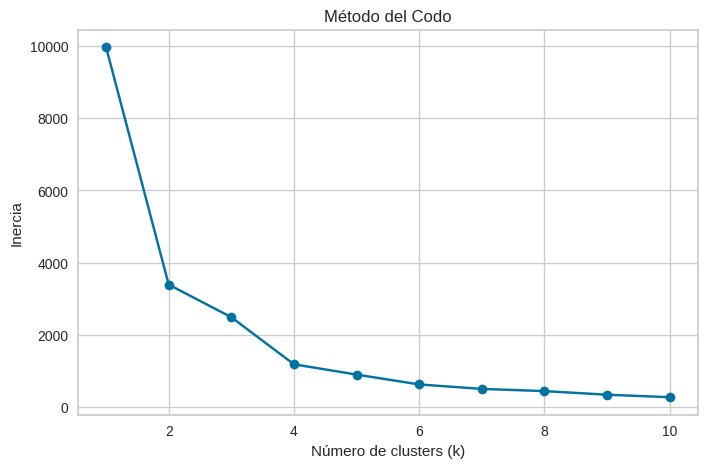

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordenadas_df[["latitud", "longitud"]])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

In [ ]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(coordenadas_df[["latitud", "longitud"]])
    score = silhouette_score(coordenadas_df[["latitud", "longitud"]], labels)
    print(f"Silhouette Score para k={k}: {score:.4f}")

Silhouette Score para k=2: 0.6414
Silhouette Score para k=3: 0.4599
Silhouette Score para k=4: 0.5460
Silhouette Score para k=5: 0.5472
Silhouette Score para k=6: 0.5666
Silhouette Score para k=7: 0.5555
Silhouette Score para k=8: 0.5078
Silhouette Score para k=9: 0.4870
Silhouette Score para k=10: 0.4927


La elección de 6 clusters se justifica principalmente por el análisis del Silhouette Score, donde k=6 presenta un valor destacado (0.5666) que representa un máximo local superior a los valores circundantes de k=5 (0.5472) y k=7 (0.5555). Si bien k=2 muestra el valor más alto (0.6414), resulta insuficiente para capturar la complejidad de los datos.

Observando el gráfico del Método del Codo proporcionado, se aprecia que la mayor inflexión ocurre entre k=1 y k=4, y a partir de ahí la curva se estabiliza gradualmente. Aunque el codo principal no está precisamente en k=6, para este punto la inercia ya se ha estabilizado significativamente, indicando que se ha alcanzado un nivel razonable de agrupación.

El factor determinante fue la inspección visual de la distribución geográfica en el mapa de Australia, donde 6 agrupaciones capturan adecuadamente las concentraciones naturales de los datos.

In [ ]:
#Aplicamos Kmeans para otener las regiones

k = 6  # Cantidad de regiones
kmeans = KMeans(n_clusters=k, random_state=42)
coordenadas_df['region'] = kmeans.fit_predict(coordenadas_df[['latitud', 'longitud']])

In [ ]:
# Crear el mapa centrado en Australia
australia_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=5)

# Colores para cada cluster
colores = ['red', 'blue', 'green', 'purple', "black","yellow"]

# Graficar las ciudades con sus clusters
for i, row in coordenadas_df.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=5,
        color=colores[row['region']],
        fill=True,
        fill_color=colores[row['region']],
        fill_opacity=0.6,
        popup=f"{row['Location']}: region {row['region']}"
    ).add_to(australia_map)

# Mostrar el mapa en el entorno de Jupyter Notebook
display(australia_map)

In [ ]:
# Hacemos merge por la columna Location
df = df.merge(coordenadas_df[['Location', 'region']], on='Location', how='left')

# Viusalizacion dataset

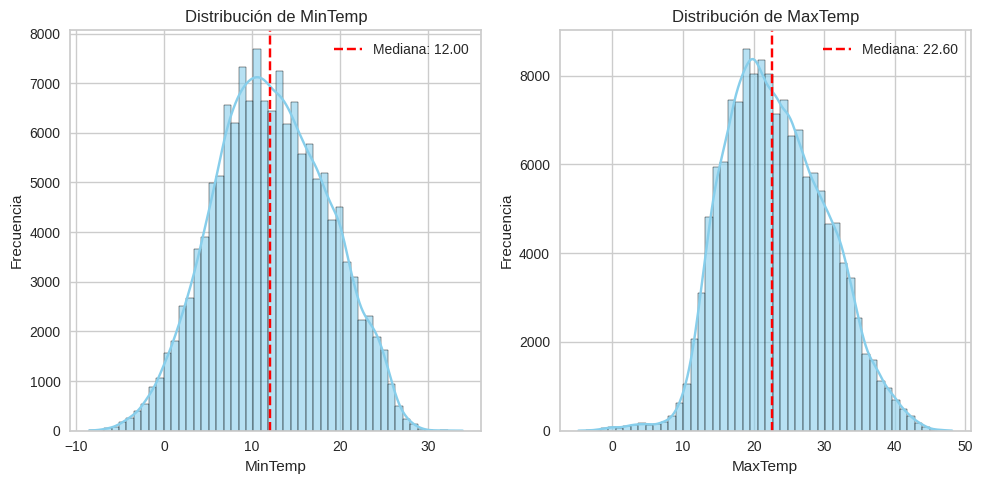

In [ ]:
variables = ['MinTemp','MaxTemp']
fig, axs = plt.subplots(1, len(variables), figsize=(5*len(variables), 5))

for i, var in enumerate(variables):
    sns.histplot(data=df, x=var, bins=50, kde=True, color='skyblue', alpha=0.6, ax=axs[i])

    # Calcular y marcar la mediana
    mediana = df[var].median()
    axs[i].axvline(mediana, color='red', linestyle='--', label=f'Mediana: {mediana:.2f}')

    # Títulos y leyenda
    axs[i].set_title(f'Distribución de {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frecuencia')
    axs[i].legend()

plt.tight_layout()
plt.show()

En MinTemp y MaxTemp vemos dos distribuciones bastantes similares y simetricas, lo que cambia es donde estan centradas, MinTemp centrada en 12 grados, con un rango aproximado de -10 y 30. MaxTemp centrada en 22.60 grados con un rango de 0 a 5 aproximadamente. Algo normal para estas variables

Text(0, 0.5, 'Frecuencia')

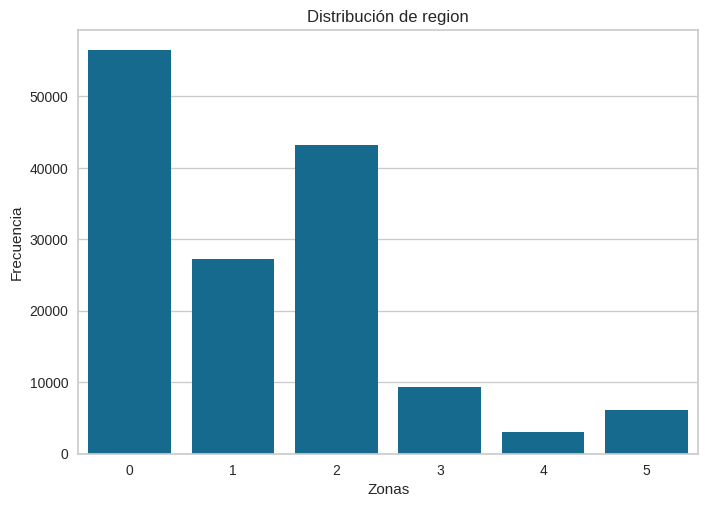

In [ ]:
sns.barplot(x=df['region'].value_counts().index, y=df['region'].value_counts())
plt.title("Distribución de region")
plt.xlabel("Zonas")
plt.ylabel("Frecuencia")

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
def asignar_estacion(mes):
    if mes in [12, 1, 2]:
        return 0  # Verano
    elif mes in [3, 4, 5]:
        return 1  # Otoño
    elif mes in [6, 7, 8]:
        return 2  # Invierno
    elif mes in [9, 10, 11]:
        return 3  # Primavera

df['Season'] = df['Month'].apply(asignar_estacion)

In [ ]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1      2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2      2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3      2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4      2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145455 2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
145456 2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
145457 2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
145458 2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
145459 2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  \
0                W           44.0          W  ...      1007.1       8.0   
1              WNW           44.0        NNW  ...      1007.8       NaN   
2              WSW           46.0          W  ...      1008.7       NaN   
3               NE           24.0         SE  ...      1012.8       NaN   
4                W           41.0        ENE  ...      1006.0       7.0   
...            ...            ...        ...  ...         ...       ...   
145455           E           31.0         SE  ...      1020.3       NaN   
145456         NNW           22.0         SE  ...      1019.1       NaN   
145457           N           37.0         SE  ...      1016.8       NaN   
145458          SE           28.0        SSE  ...      1016.5       3.0   
145459         NaN            NaN        ESE  ...      1017.9       8.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  region  Month  \
0            NaN     16.9     21.8         No            No       0     12   
1            NaN     17.2     24.3         No            No       0     12   
2            2.0     21.0     23.2         No            No       0     12   
3            NaN     18.1     26.5         No            No       0     12   
4            8.0     17.8     29.7         No            No       0     12   
...          ...      ...      ...        ...           ...     ...    ...   
145455       NaN     10.1     22.4         No            No       3      6   
145456       NaN     10.9     24.5         No            No       3      6   
145457       NaN     12.5     26.1         No            No       3      6   
145458       2.0     15.1     26.0         No            No       3      6   
145459       8.0     15.0     20.9         No           NaN       3      6   

        Season  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
145455       2  
145456       2  
145457       2  
145458       2  
145459       2  

[145460 rows x 26 columns]

Text(0, 0.5, 'Frecuencia')

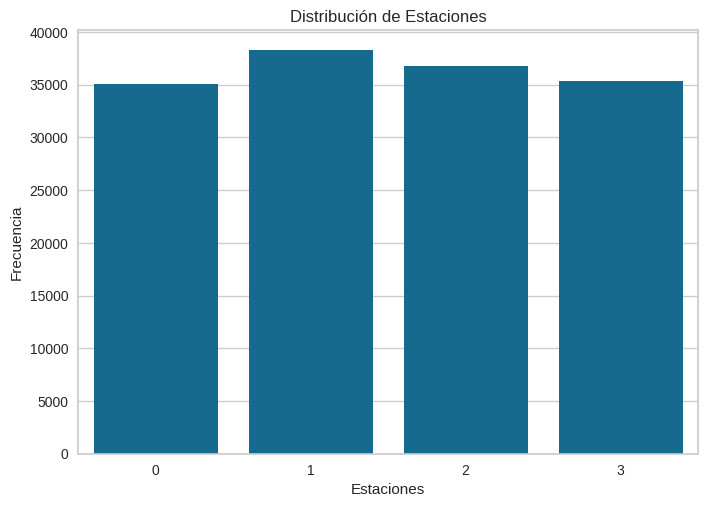

In [ ]:
sns.barplot(x=df['Season'].value_counts().index, y=df['Season'].value_counts())
plt.title("Distribución de Estaciones")
plt.xlabel("Estaciones")
plt.ylabel("Frecuencia")

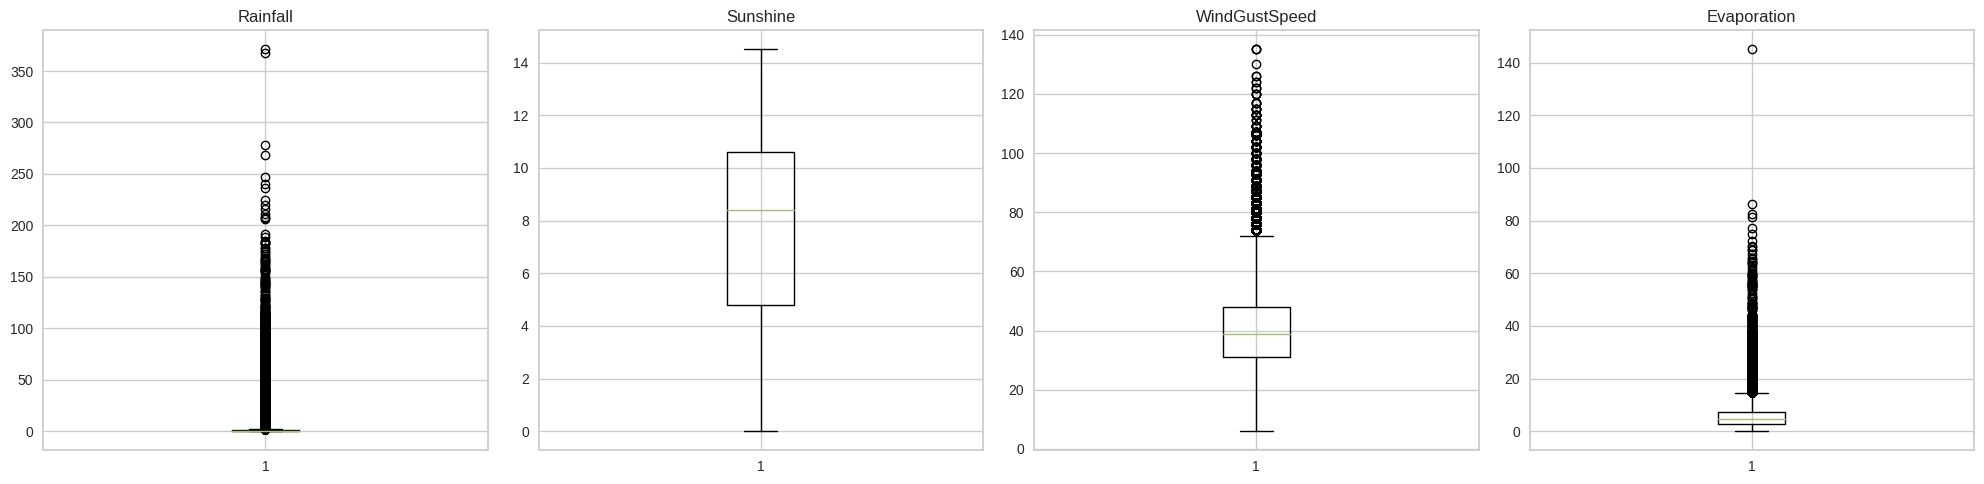

In [ ]:

variables = ['Rainfall', 'Sunshine','WindGustSpeed','Evaporation']
fig, axs = plt.subplots(1, len(variables), figsize=(5*len(variables), 5))  # 1 fila, N columnas

for i, var in enumerate(variables):
    axs[i].boxplot(df[var].dropna())
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

Vemos en Rainfall, windgustspeed y evaporation posibles outliers. En sunshine algo mas simetrico

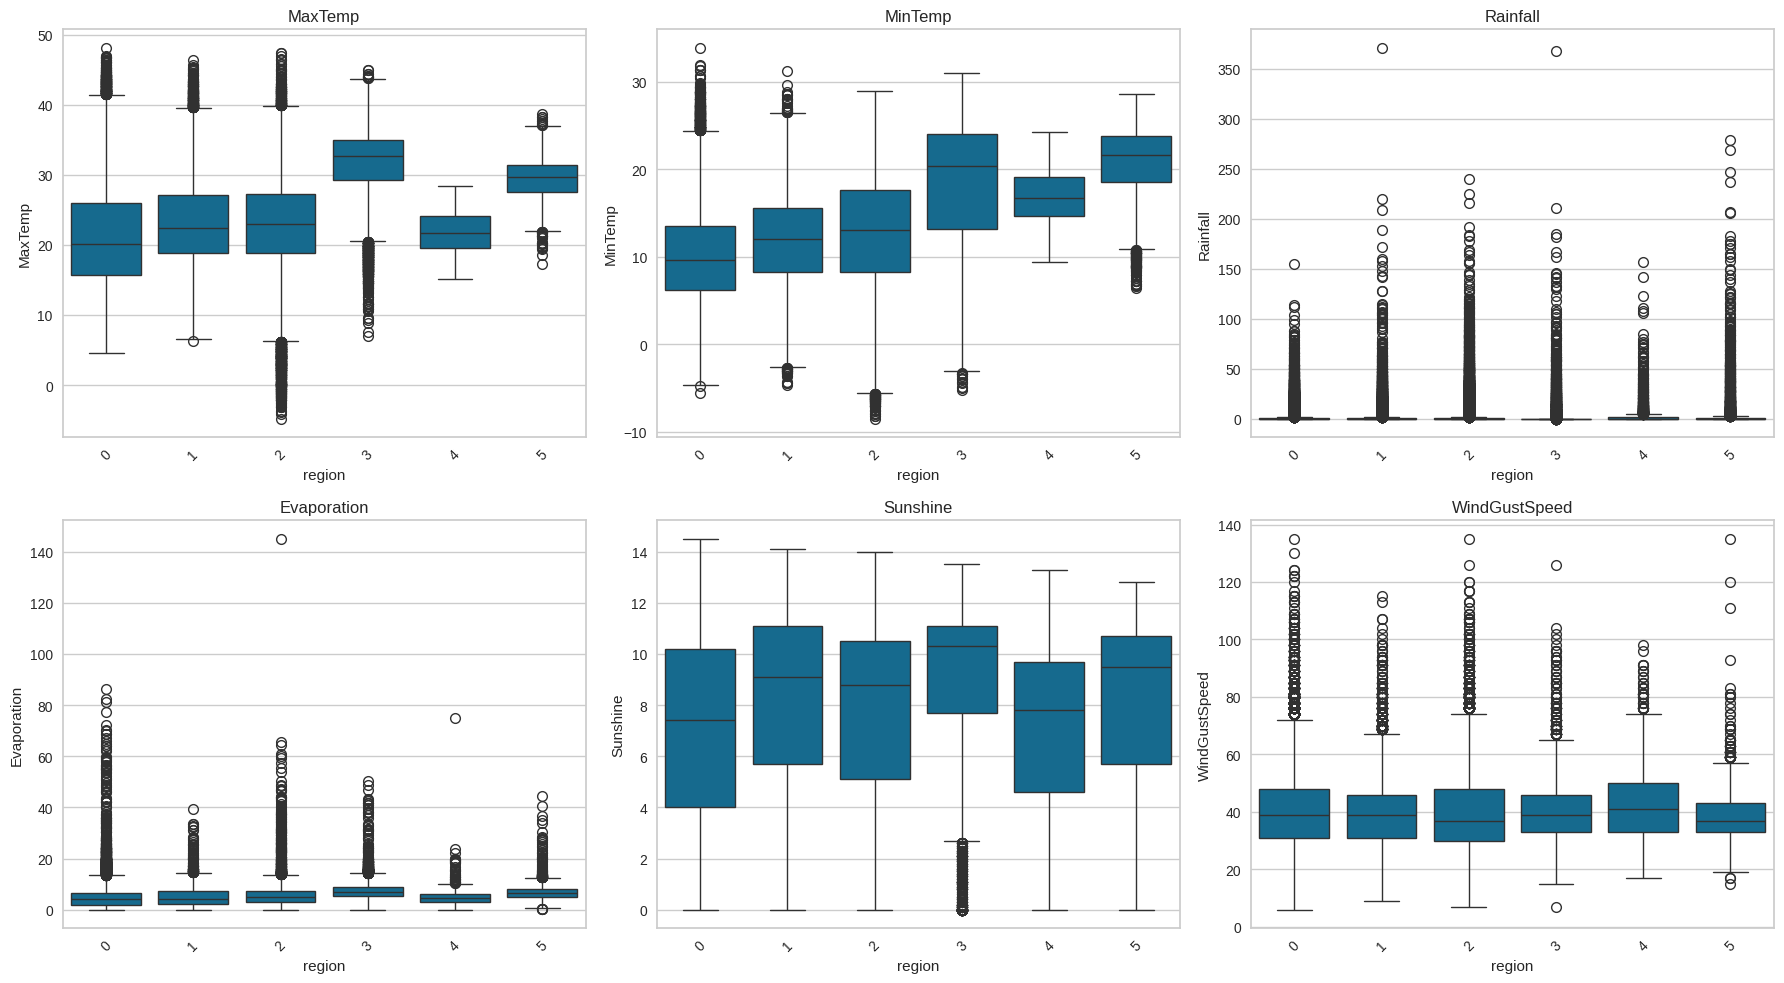

In [ ]:
variables = ['MaxTemp', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed']
n = len(variables)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Para recorrerlos fácilmente en un solo loop

for i, var in enumerate(variables):
    sns.boxplot(ax=axes[i], x='region', y=var, data=df)
    axes[i].set_title(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

* Las regiones australianas muestran patrones climáticos claramente
diferenciados. Las regiones 3 y 5 presentan el perfil más cálido, con temperaturas máximas y mínimas notablemente superiores al resto, mientras que las regiones 0, 1 y 2 registran temperaturas más moderadas con mayor variabilidad.

* La precipitación mantiene medianas similares en todas las regiones, aunque con distribuciones de valores extremos distintas, destacando la región 5 con lluvias ocasionales más intensas.

* La evaporación es generalmente baja en todo el territorio, con casos excepcionales en la región 0.

* Las horas de sol se correlacionan con las temperaturas, siendo la región 3 la más soleada.

* La velocidad del viento muestra comportamiento relativamente homogéneo entre regiones.

**Estas marcadas diferencias climáticas validan la segmentación territorial en seis regiones, capturando eficientemente la diversidad bioclimática australiana y confirmando que la elección de seis clusters permite identificar zonas con características meteorológicas distintivas y coherentes.**

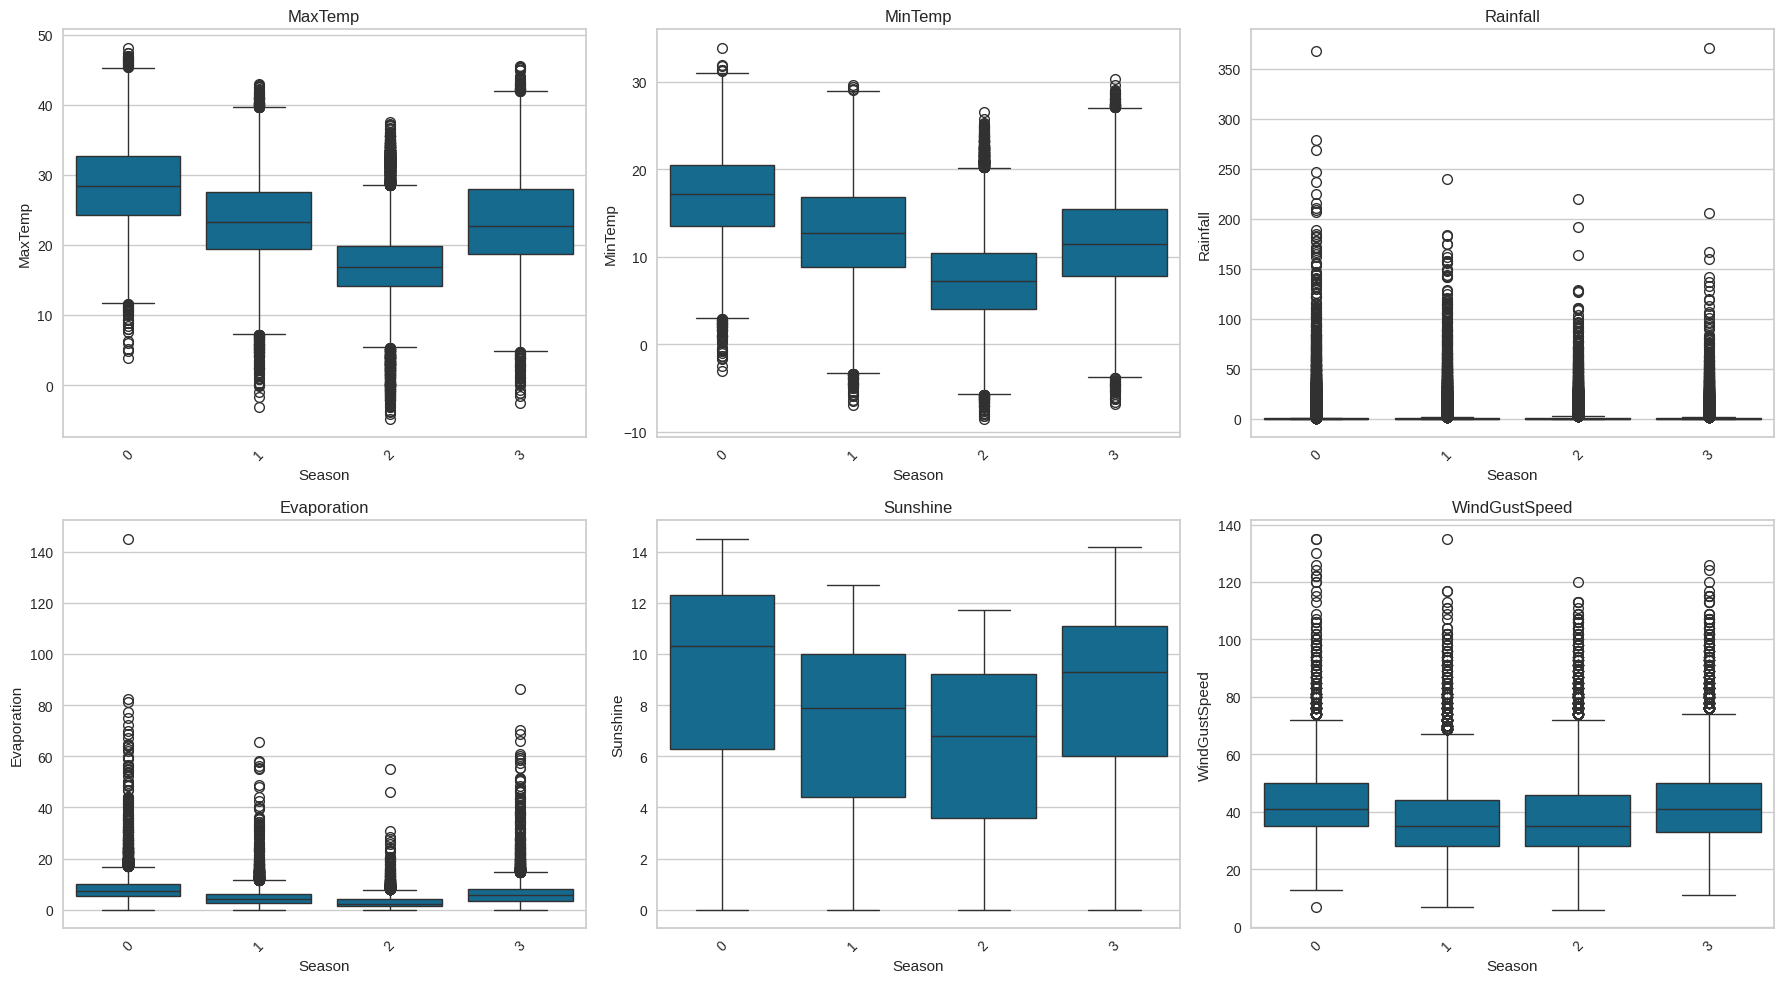

In [ ]:
variables = ['MaxTemp', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed']
n = len(variables)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Para recorrerlos fácilmente en un solo loop

for i, var in enumerate(variables):
    sns.boxplot(ax=axes[i], x='Season', y=var, data=df)
    axes[i].set_title(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Se puede ver que dependiendo la zona tenemos diferentes situaciones para las variables, ejemplo: Para la zona 5 y 6 tenemos valores altos de maxtemp y mintemp lo que nos indica que es una zona con mucho calor

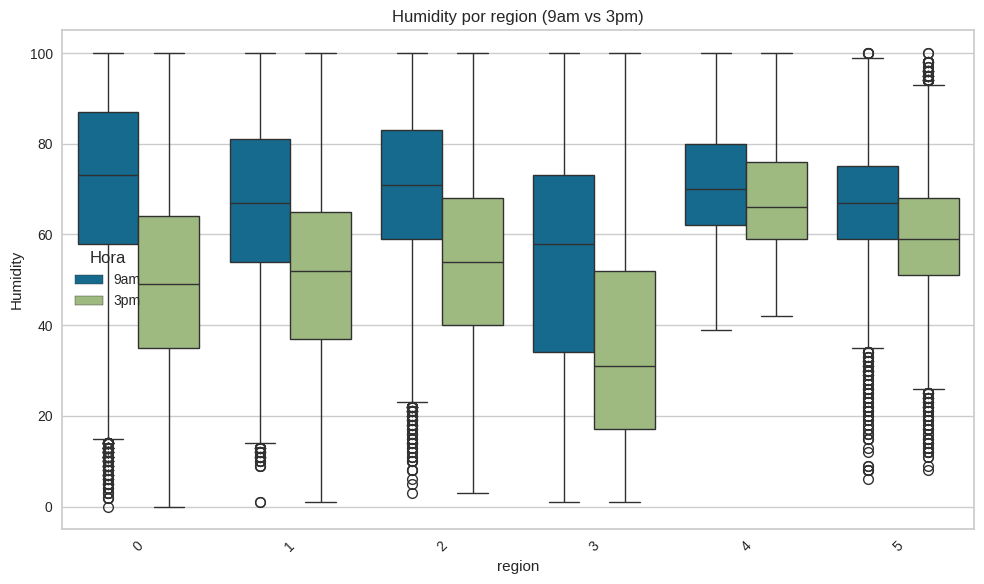

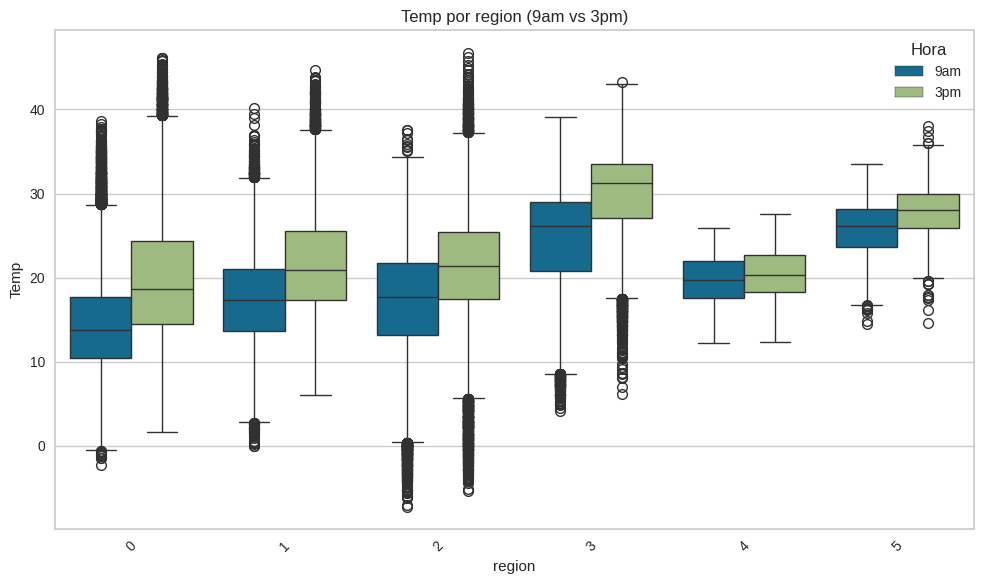

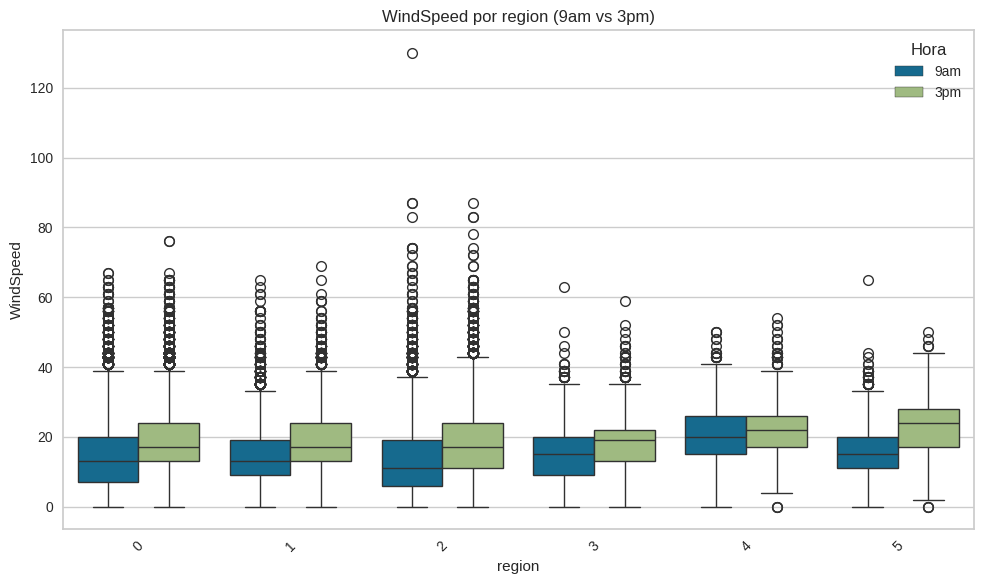

In [ ]:
def boxplot_am_pm_por_zona(df, variable_base, zona_col='region'):
    """
    Crea un boxplot comparando valores a las 9am y 3pm para una variable dada, separados por zona climática.

    variable_base: nombre común de la variable (ej. 'Humidity', 'Temp', 'WindSpeed')
    zona_col: columna que representa la zona (por defecto 'region')
    """
    col_am = f"{variable_base}9am"
    col_pm = f"{variable_base}3pm"

    if col_am not in df.columns or col_pm not in df.columns:
        print(f"No se encontraron columnas {col_am} y/o {col_pm}")
        return

    df_temp = df[[zona_col, col_am, col_pm]].copy()
    df_temp = df_temp.melt(id_vars=zona_col,
                           value_vars=[col_am, col_pm],
                           var_name='Hora',
                           value_name=variable_base)
    df_temp['Hora'] = df_temp['Hora'].replace({col_am: '9am', col_pm: '3pm'})

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=zona_col, y=variable_base, hue='Hora', data=df_temp)
    plt.title(f'{variable_base} por {zona_col} (9am vs 3pm)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

boxplot_am_pm_por_zona(df, 'Humidity')
boxplot_am_pm_por_zona(df, 'Temp')
boxplot_am_pm_por_zona(df, 'WindSpeed')

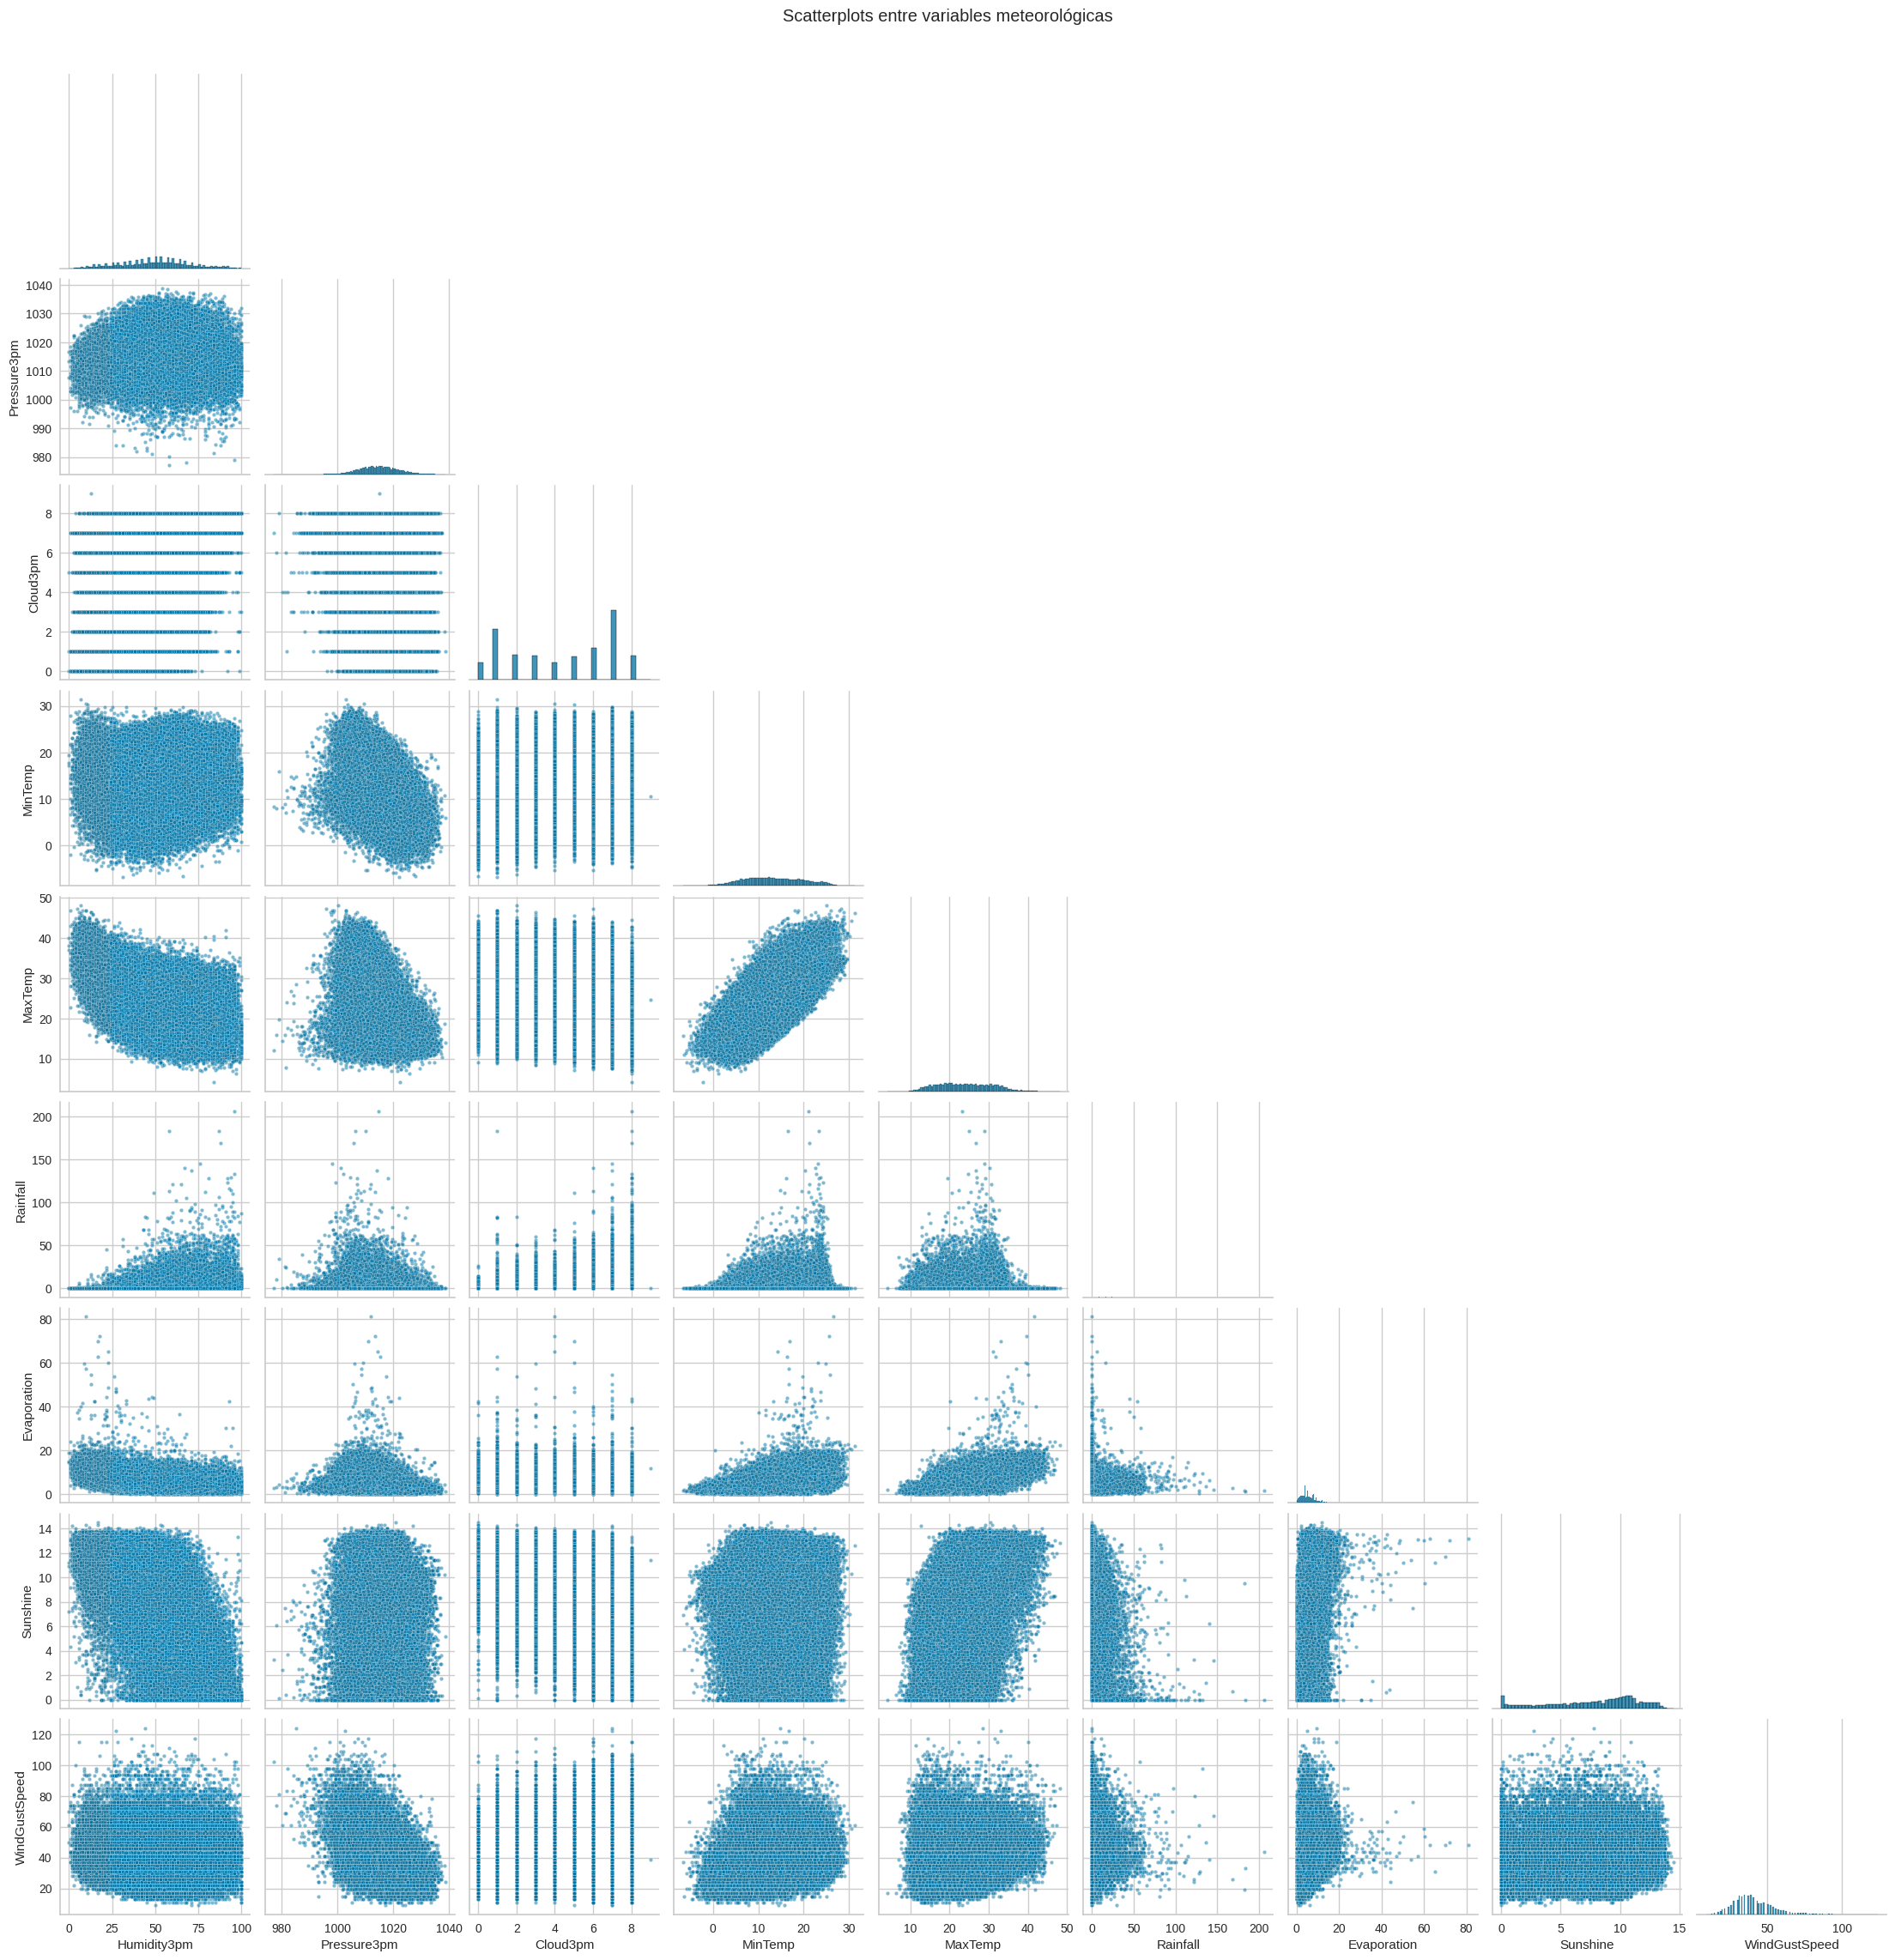

In [ ]:
vars_interes = [
    'Humidity3pm',
    'Pressure3pm', 'Cloud3pm',
    'MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine', 'WindGustSpeed'
]

df_filtrado = df[vars_interes].dropna()

sns.pairplot(df_filtrado,corner=True,diag_kind='hist', plot_kws={'alpha':0.5, 's':10})
plt.suptitle("Scatterplots entre variables meteorológicas", y=1.02)
plt.show()

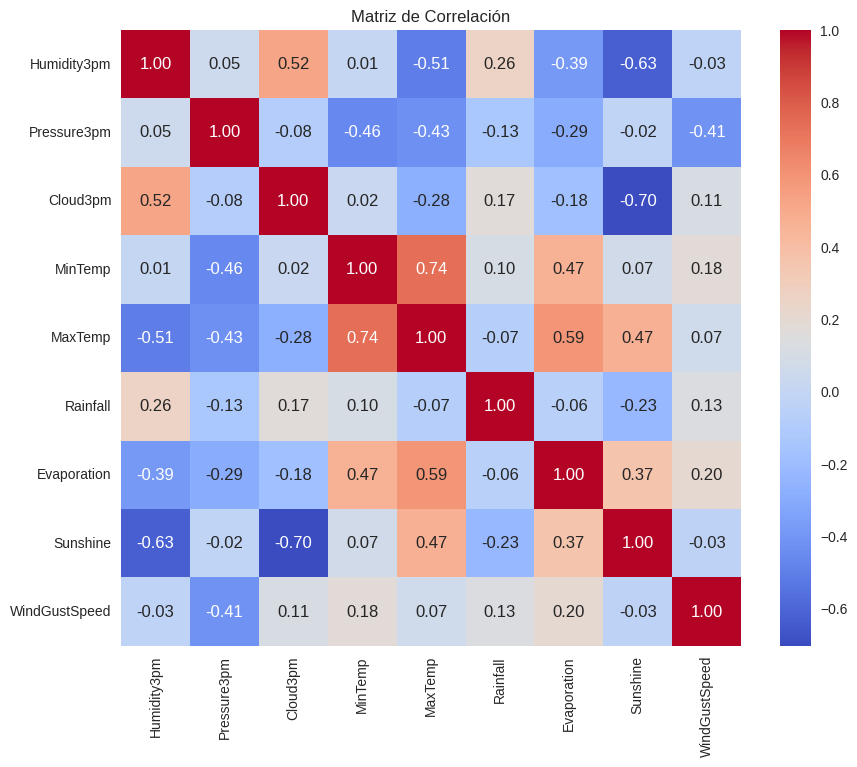

In [ ]:
# Calcular la matriz de correlación
datos_num = df[[ 'Humidity3pm',
    'Pressure3pm', 'Cloud3pm',
    'MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine', 'WindGustSpeed']]
matriz_correlacion = datos_num.corr()


# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


La matriz de correlación revela patrones climáticos significativos en el territorio australiano.
* Existe una fuerte correlación positiva (0.74) entre temperaturas mínimas y máximas, indicando regiones con tendencia a ser consistentemente cálidas o frías.

* La nubosidad y humedad a las 3pm muestran correlación considerable (0.52), mientras ambas presentan fuerte correlación negativa con las horas de sol (-0.70 y -0.63 respectivamente), confirmando la interdependencia lógica entre estos factores.

* Las temperaturas máximas mantienen correlación positiva con la evaporación (0.59) y horas de sol (0.47), pero negativa con la humedad (-0.51), reflejando que ambientes calurosos y secos favorecen mayor evaporación.

* Sorprendentemente, la precipitación muestra correlaciones débiles con la mayoría de variables, sugiriendo que los eventos de lluvia responden a dinámicas más complejas o localizadas.

* La presión atmosférica a las 3pm correlaciona negativamente con temperaturas (-0.43 con máximas) y velocidad del viento (-0.41), consistente con principios meteorológicos donde sistemas de baja presión suelen asociarse con condiciones más cálidas y ventosas.

* Estas relaciones confirman la interconexión de variables climáticas y justifican el enfoque multivariable aplicado en la segmentación regional.

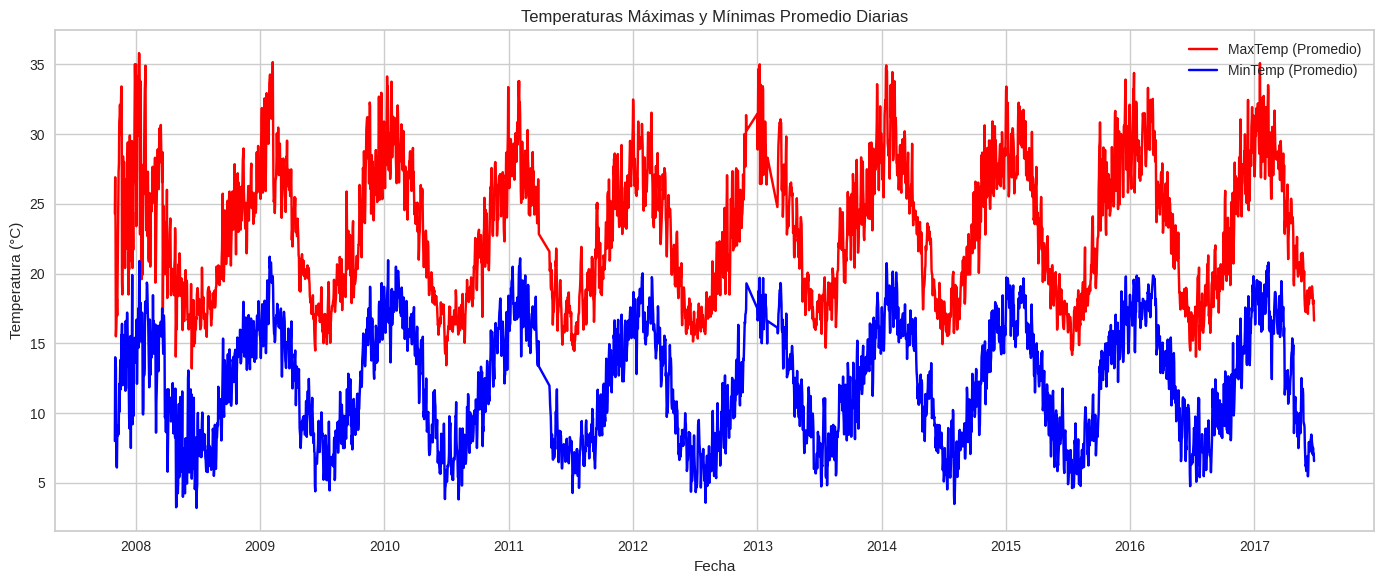

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Agrupamos por fecha y calculamos el promedio de MaxTemp y MinTemp
daily_avg_temp = df.groupby('Date')[['MaxTemp', 'MinTemp']].mean()

# Graficamos
plt.figure(figsize=(14, 6))
plt.plot(daily_avg_temp.index, daily_avg_temp['MaxTemp'], label='MaxTemp (Promedio)', color='red')
plt.plot(daily_avg_temp.index, daily_avg_temp['MinTemp'], label='MinTemp (Promedio)', color='blue')
plt.title('Temperaturas Máximas y Mínimas Promedio Diarias')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Promedio mensual de lluvia'}, xlabel='Date', ylabel='mm'>

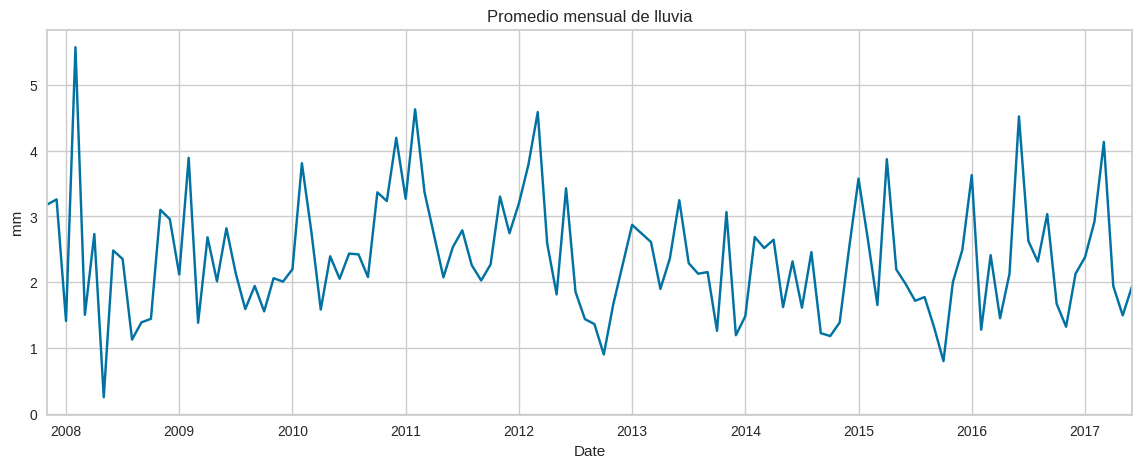

In [ ]:
rainfall_monthly = df.groupby(df['Date'].dt.to_period('M'))['Rainfall'].mean()
rainfall_monthly.plot(title='Promedio mensual de lluvia', figsize=(14, 5), ylabel='mm')

El gráfico muestra un patrón de precipitaciones altamente variable a lo largo del período analizado, sin una tendencia clara de incremento o disminución a largo plazo.

<Axes: title={'center': 'Promedio de horas de sol por mes'}, xlabel='Month', ylabel='Horas'>

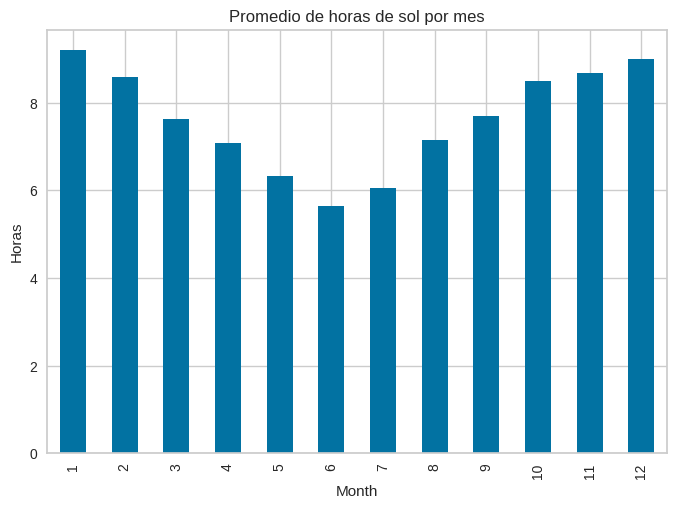

In [ ]:
df['Month'] = df['Date'].dt.month
sunshine_monthly = df.groupby('Month')['Sunshine'].mean()
sunshine_monthly.plot(kind='bar', title='Promedio de horas de sol por mes', ylabel='Horas')


Vemos algo logico donde en las esquinas que seria verano tenemos mas horas de sol, y acercandonos al centro va disminuyendo ya que es invierno

<Axes: title={'center': 'Velocidad del viento promedio mensual'}, xlabel='Date', ylabel='km/h'>

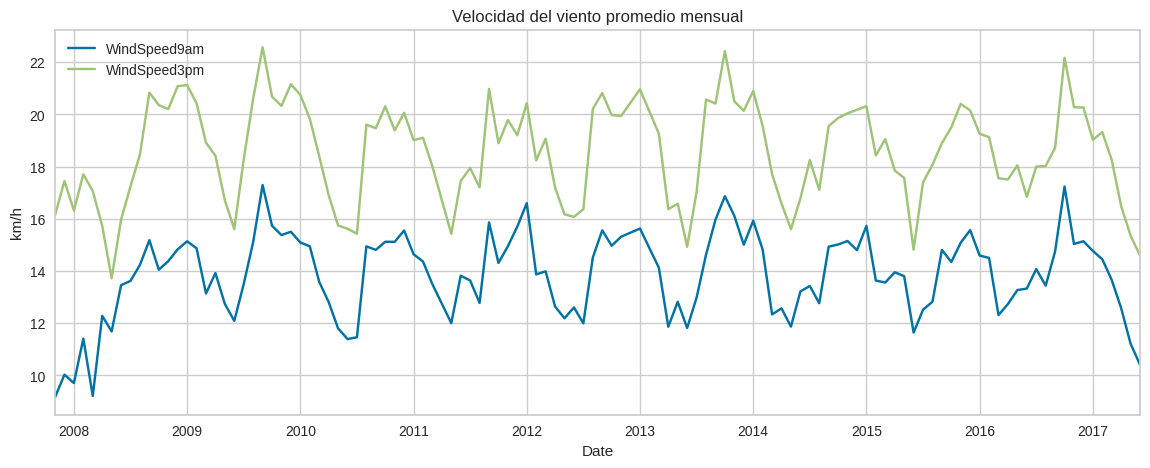

In [ ]:
wind_speed = df.groupby(df['Date'].dt.to_period('M'))[['WindSpeed9am', 'WindSpeed3pm']].mean()
wind_speed.plot(title='Velocidad del viento promedio mensual', figsize=(14, 5), ylabel='km/h')


# Acondicionamiento del dataset

## Dividir en conjunto de entrenamiento y test

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

## Imputacion y codificacion

In [ ]:
#Mapeamos los yes y no a 1 y 0
train_df['RainToday'] = train_df['RainToday'].map({'No': 0, 'Yes': 1})
train_df['RainTomorrow'] = train_df['RainTomorrow'].map({'No': 0, 'Yes': 1})

#Mapeamos los yes y no a 1 y 0
test_df['RainToday'] = test_df['RainToday'].map({'No': 0, 'Yes': 1})
test_df['RainTomorrow'] = test_df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [ ]:
# Análisis de valores nulos en el DataFrame

# Conteo de valores nulos por columna (como porcentaje)
null_percent = train_df.isnull().mean() * 100
null_percent_sorted = null_percent.sort_values(ascending=False)

# Totales generales
total_nan = train_df.isnull().sum().sum()
total_values = train_df.size
porcentaje_total_nulos = (total_nan / total_values) * 100

# Porcentaje que aporta cada columna al total de nulos
nulos_por_columna = train_df.isnull().sum()
porcentaje_aporte = (nulos_por_columna / total_nan * 100).sort_values(ascending=False)

# Mostrar resultados
print(f"Total de valores nulos: {total_nan}")
print(f"Total de valores: {total_values}")
print(f"Porcentaje total de valores nulos: {porcentaje_total_nulos:.2f}%\n")

print("Porcentaje de nulos por columna")
print(null_percent_sorted.round(2))

print("\nPorcentaje que aporta cada variable al total de nulos:")
print(porcentaje_aporte.apply(lambda x: f"{x:.2f}%"))

Total de valores nulos: 274848
Total de valores: 3025568
Porcentaje total de valores nulos: 9.08%

Porcentaje de nulos por columna
Sunshine         48.07
Evaporation      43.25
Cloud3pm         40.86
Cloud9am         38.46
Pressure9am      10.36
Pressure3pm      10.35
WindDir9am        7.24
WindGustDir       7.09
WindGustSpeed     7.05
Humidity3pm       3.11
WindDir3pm        2.92
Temp3pm           2.49
RainTomorrow      2.24
RainToday         2.24
Rainfall          2.24
WindSpeed3pm      2.11
Humidity9am       1.82
WindSpeed9am      1.21
Temp9am           1.21
MinTemp           1.01
MaxTemp           0.86
Month             0.00
region            0.00
Date              0.00
Location          0.00
Season            0.00
dtype: float64

Porcentaje que aporta cada variable al total de nulos:
Sunshine         20.35%
Evaporation      18.31%
Cloud3pm         17.30%
Cloud9am         16.28%
Pressure9am       4.39%
Pressure3pm       4.38%
WindDir9am        3.07%
WindGustDir       3.00%
WindGust

In [ ]:
variables_a_imputar = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']

original = df[variables_a_imputar].copy()

In [ ]:
# Elegimos las columnas a imputar
variables_para_imputar = ['Sunshine', 'Evaporation']

#la fecha esté en formato datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Ordenamos primero por region y fecha
train_df = train_df.sort_values(['region', 'Date'])

train_df[variables_para_imputar] = train_df.groupby(['region', 'Month'])[variables_para_imputar].transform(lambda x: x.fillna(x.median()))

Decidimos imputar a traves de series de tiempo ya que teniamos las fechas y las variables son relativamente continuas, y por regiones para que las imputaciones sean los mas naturales posibles. Agrupando region y mes, calculando la mediana de cada grupo e ir imputando en las variables sunshine y evaporation.

In [ ]:
#Calcular medianas por grupo en train
medianas_train = (
    train_df
    .groupby(['region', 'Month'])[variables_para_imputar]
    .median()
)

#Función para imputar test con esas medianas
def imputar_test_con_medianas(test_df, columnas, medianas_train):
    test_df_copy = test_df.copy()

    for col in columnas:
        def imputar_fila(fila):
            if pd.isna(fila[col]):
                key = (fila['region'], fila['Month'])
                if key in medianas_train.index:
                    return medianas_train.loc[key, col]
            return fila[col]

        test_df_copy[col] = test_df_copy.apply(imputar_fila, axis=1)

    return test_df_copy

#Aplicar imputación
test_df = imputar_test_con_medianas(test_df, variables_para_imputar, medianas_train)

Vemos que despues de imputar las variables siguen manteniendo sus distribuciones

In [ ]:
#imputación por muestreo aleatorio ponderado por región y mes
def imputar_por_ponderacion(df, columna, grupo):
    df_copy = df.copy()

    def imputar_grupo(grupo_df):
        valores = grupo_df[columna].dropna()
        if valores.empty:
            return grupo_df[columna]  # No imputar si no hay datos válidos
        # Frecuencia relativa de cada valor
        probs = valores.value_counts(normalize=True)
        faltantes_idx = grupo_df[columna].isna()

        # Muestreo aleatorio según distribución observada
        muestras = np.random.choice(probs.index, size=faltantes_idx.sum(), p=probs.values)
        grupo_df.loc[faltantes_idx, columna] = muestras
        return grupo_df[columna]

    df_copy[columna] = df_copy.groupby(grupo, group_keys=False).apply(imputar_grupo)
    return df_copy
# Aplicamos para ambas columnas
train_df = imputar_por_ponderacion(train_df, 'Cloud3pm', ['region', 'Month'])
train_df = imputar_por_ponderacion(train_df, 'Cloud9am', ['region', 'Month'])

In [ ]:
def get_distribuciones_por_grupo(train_df, columna, grupo):
    distribuciones = {}

    # Agrupamos y calculamos frecuencias relativas por grupo
    for keys, group_df in train_df.groupby(grupo):
        valores = group_df[columna].dropna()
        if not valores.empty:
            probs = valores.value_counts(normalize=True)
            distribuciones[keys] = probs
    return distribuciones

def imputar_test_con_distribuciones(test_df, columna, grupo, distribuciones):
    test_df_copy = test_df.copy()

    def imputar_fila(fila):
        key = tuple(fila[g] for g in grupo)
        if pd.isna(fila[columna]):
            if key in distribuciones:
                dist = distribuciones[key]
                return np.random.choice(dist.index, p=dist.values)
        return fila[columna]

    test_df_copy[columna] = test_df_copy.apply(imputar_fila, axis=1)
    return test_df_copy
# 1. Obtener las distribuciones del train
dist_cloud3pm = get_distribuciones_por_grupo(train_df, 'Cloud3pm', ['region', 'Month'])
dist_cloud9am = get_distribuciones_por_grupo(train_df, 'Cloud9am', ['region', 'Month'])

# 2. Imputar test usando esas distribuciones
test_df = imputar_test_con_distribuciones(test_df, 'Cloud3pm', ['region', 'Month'], dist_cloud3pm)
test_df = imputar_test_con_distribuciones(test_df, 'Cloud9am', ['region', 'Month'], dist_cloud9am)

En el caso de las variables Cloud3pm y Cloud9am, que a traves de un analisis y investigacion, probablemente se trate de una variable ordinal discreta en donde representan cantidad de nubosidad en octavos, es decir, un valor entre 0 (despejado) y 8 (completamente nublado).En meteorología, la cobertura nubosa muchas veces se mide en octas (de 0 a 8), y es un estándar mundial (usado por el Bureau of Meteorology de Australia, entre otros). Entonces decidimos usar imputacion por muestreo aleatorio ponderado por region y mes
- Imputación por muestreo aleatorio ponderado por región y mes: se elige un valor aleatorio entre los posibles valores, pero no con igual probabilidad, sino ponderado según la frecuencia relativa.
Esto quiere decir que si el valor 2 es el más común, es más probable que se elija ese valor para reemplazar un NaN, pero también hay chance para otros valores, manteniendo la variabilidad natural.

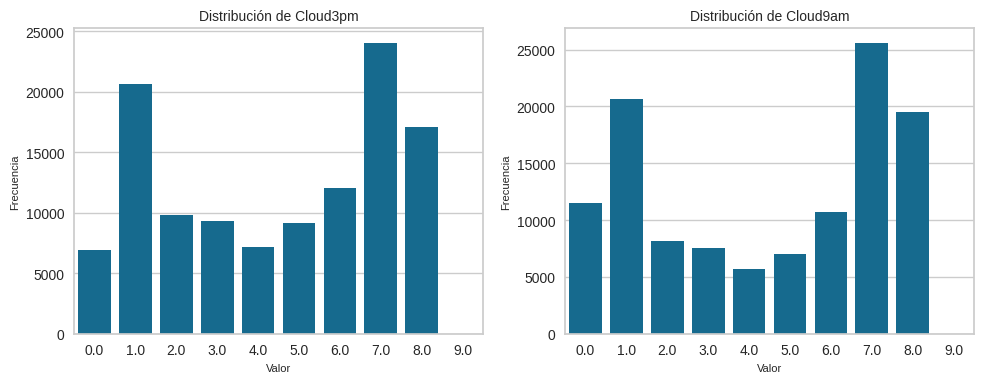

In [ ]:
# Vamos a superponer HISTOGRAMAS con KDE (estimación de densidad) y además ver la distribución de la target
variables= ['Cloud3pm', 'Cloud9am']
num_vars = len(variables)

# Crear figura con 1 fila y N columnas
fig, axes = plt.subplots(1, num_vars, figsize=(5 * num_vars, 4))  # Altura más baja

# Asegurar que axes sea iterable
if num_vars == 1:
    axes = [axes]

# Graficar cada variable numérica en su propio subplot
for i, col in enumerate(variables):
    sns.countplot(x=train_df[col],data= train_df,ax=axes[i])
    axes[i].set_title(f"Distribución de {col}", fontsize=10)
    axes[i].set_xlabel("Valor", fontsize=8)
    axes[i].set_ylabel("Frecuencia", fontsize=8)
plt.tight_layout()
plt.show()

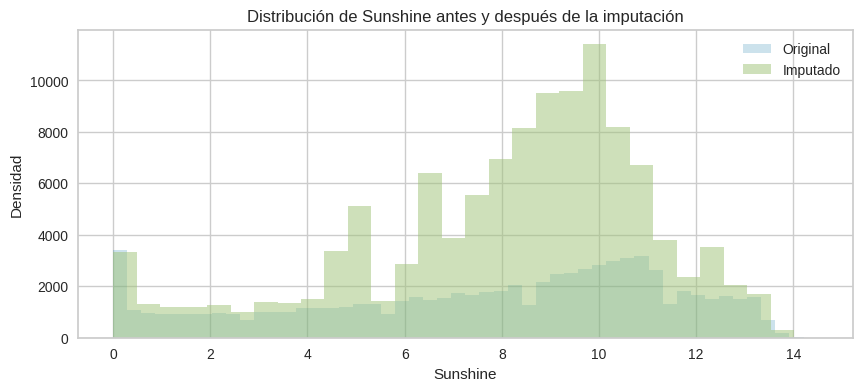

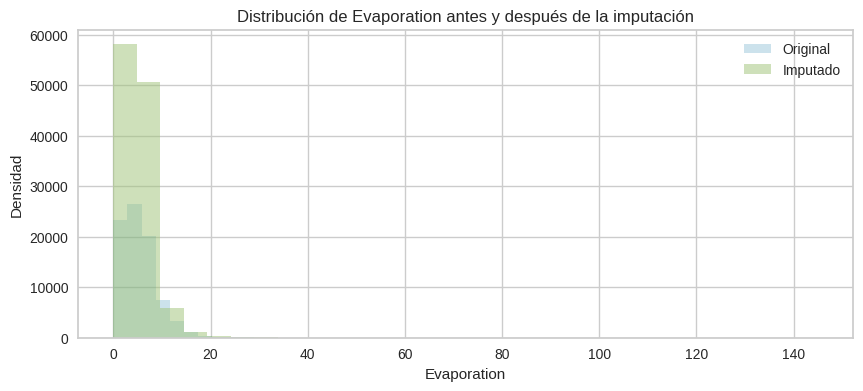

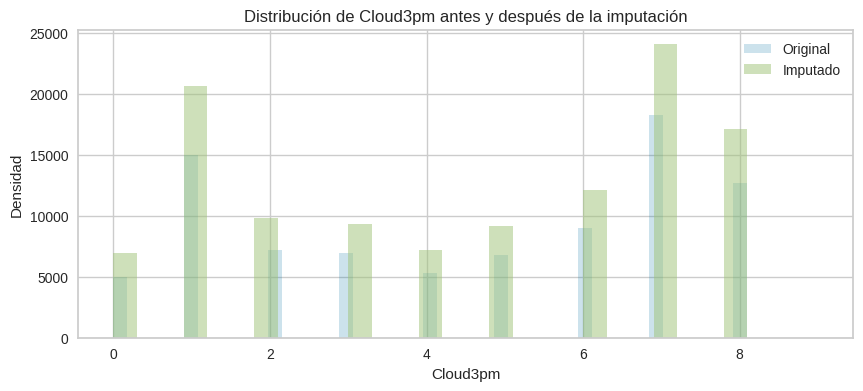

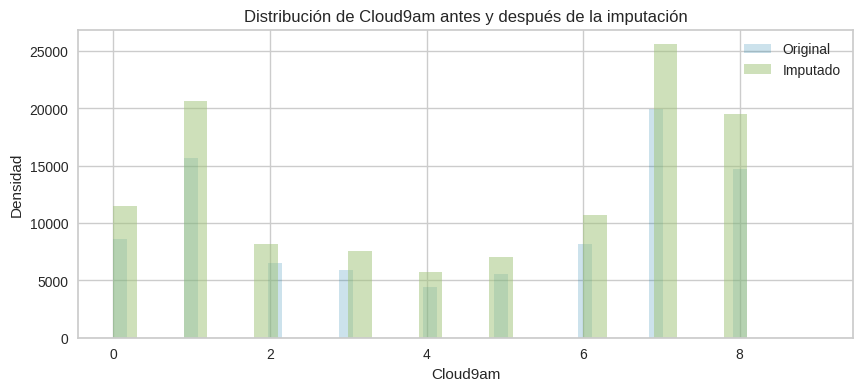

In [ ]:
for col in variables_a_imputar:
    plt.figure(figsize=(10, 4))
    plt.hist(original[col].dropna(), bins=50, alpha=0.2, label='Original', density=False)
    plt.hist(train_df[col], bins=30, alpha=0.5, label='Imputado', density=False)
    plt.title(f'Distribución de {col} antes y después de la imputación')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

Se puede ver que siguen manteniendo una misma distribucion de los datos

In [ ]:
# Ver las filas donde tanto RainTomorrow como RainToday son nulos
nulos_ambos = train_df[train_df['RainTomorrow'].isnull() & train_df['RainToday'].isnull()]
num_nulos_ambos = nulos_ambos.shape[0]
# Calcular el número total de filas en el dataset
num_total = df.shape[0]

# Calcular el porcentaje de filas con nulos en ambos
porcentaje_nulos_ambos = (num_nulos_ambos / num_total) * 100

# Mostrar el resultado
print(f"Porcentaje de filas donde RainTomorrow y RainToday son nulos: {porcentaje_nulos_ambos:.2f}%")

Porcentaje de filas donde RainTomorrow y RainToday son nulos: 1.02%


In [ ]:
train_df = train_df.dropna(subset=['RainToday', 'RainTomorrow'])
test_df = test_df.dropna(subset=['RainToday', 'RainTomorrow'])


In [ ]:
#Para las demas variables que contenian nulos decidimos imputar por region y mes, para que sea lo mas parecido posible y no haya tanta contaminacion.
# Imputación por región y mes
train_df['MaxTemp'] = train_df.groupby(['region', 'Month'])['MaxTemp'].transform(lambda x: x.fillna(x.mean()))
train_df['MinTemp'] = train_df.groupby(['region', 'Month'])['MinTemp'].transform(lambda x: x.fillna(x.mean()))
train_df['WindGustSpeed'] = train_df.groupby(['region', 'Month'])['WindGustSpeed'].transform(lambda x: x.fillna(x.mean()))
train_df['Rainfall'] = train_df.groupby(['region', 'Month'])['Rainfall'].transform(lambda x: x.fillna(x.median()))
train_df['Pressure9am'] = train_df.groupby(['region', 'Month'])['Pressure9am'].transform(lambda x: x.fillna(x.mean()))
train_df['Pressure3pm'] = train_df.groupby(['region', 'Month'])['Pressure3pm'].transform(lambda x: x.fillna(x.mean()))
train_df['Temp9am'] = train_df.groupby(['region', 'Month'])['Temp9am'].transform(lambda x: x.fillna(x.mean()))
train_df['Temp3pm'] = train_df.groupby(['region', 'Month'])['Temp3pm'].transform(lambda x: x.fillna(x.mean()))
train_df['WindSpeed3pm'] = train_df.groupby(['region', 'Month'])['WindSpeed3pm'].transform(lambda x: x.fillna(x.mean()))
train_df['Humidity9am'] = train_df.groupby(['region', 'Month'])['Humidity9am'].transform(lambda x: x.fillna(x.mean()))
train_df['WindSpeed9am'] = train_df.groupby(['region', 'Month'])['WindSpeed9am'].transform(lambda x: x.fillna(x.mean()))
train_df['Humidity3pm'] = train_df.groupby(['region', 'Month'])['Humidity3pm'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
def imputar_con_media_de_train(train_df, test_df, columna, grupo):
    medias = train_df.groupby(grupo)[columna].mean().reset_index()
    medias = medias.rename(columns={columna: columna + '_mean'})
    test_df = test_df.merge(medias, on=grupo, how='left')
    test_df[columna] = test_df[columna].fillna(test_df[columna + '_mean'])
    return test_df.drop(columns=[columna + '_mean'])

In [ ]:
test_df = imputar_con_media_de_train(train_df, test_df, 'MaxTemp', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'MinTemp', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'WindGustSpeed', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'Rainfall', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'Pressure9am', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'Pressure3pm', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'Temp9am', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'Temp3pm', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'WindSpeed3pm', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'WindSpeed9am', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'Humidity3pm', ['region', 'Month'])
test_df = imputar_con_media_de_train(train_df, test_df, 'Humidity9am', ['region', 'Month'])

In [ ]:
# Imputación por zona geográfica utilizando la moda de cada zona en variables categoricas
def fill_mode_safe(x):
    mode = x.mode()
    if not mode.empty:
        return x.fillna(mode[0])
    else:
        return x  # No hay moda, no imputar nada

train_df['WindDir9am'] = train_df.groupby('region')['WindDir9am'].transform(fill_mode_safe)
train_df['WindGustDir'] = train_df.groupby('region')['WindGustDir'].transform(fill_mode_safe)
train_df['WindDir3pm'] = train_df.groupby('region')['WindDir3pm'].transform(fill_mode_safe)

In [ ]:
# 1. Obtener la moda por región en train_df
modas_train = {
    col: train_df.groupby('region')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    for col in ['WindDir9am', 'WindGustDir', 'WindDir3pm']
}

# 2. Función para imputar con esas modas
def imputar_categoricas_con_moda(test_df, columnas, modas_train):
    test_df_copy = test_df.copy()
    for col in columnas:
        test_df_copy[col] = test_df_copy.apply(
            lambda row: modas_train[col].get(row['region'], np.nan) if pd.isna(row[col]) else row[col],
            axis=1
        )
    return test_df_copy

# 3. Aplicar a test_df
test_df = imputar_categoricas_con_moda(test_df, ['WindDir9am', 'WindGustDir', 'WindDir3pm'], modas_train)

In [ ]:
#Confirmamos de que se hayan limpiado todos los nulos
null_percent = test_df.isnull().mean() * 100

# Mostrar ordenado de mayor a menor
null_percent = null_percent.sort_values(ascending=False)

# Mostrar como porcentaje con dos decimales
print(null_percent.round(2).head(20))

Date             0.0
Location         0.0
Month            0.0
region           0.0
RainTomorrow     0.0
RainToday        0.0
Temp3pm          0.0
Temp9am          0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Pressure9am      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
WindSpeed9am     0.0
WindDir3pm       0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
dtype: float64


In [ ]:
#convertir una variable circular categórica (dirección del viento) en dos variables numéricas continuas.
wind_dir_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
train_df['WindGustDir'] = train_df['WindGustDir'].map(wind_dir_map)
train_df['WindDir_sin'] = np.sin(np.deg2rad(train_df['WindGustDir']))
train_df['WindDir_cos'] = np.cos(np.deg2rad(train_df['WindGustDir']))

train_df['WindDir9am'] = train_df['WindDir9am'].map(wind_dir_map)
train_df['WindDir9am_sin'] = np.sin(np.deg2rad(train_df['WindDir9am']))
train_df['WindDir9am_cos'] = np.cos(np.deg2rad(train_df['WindDir9am']))

train_df['WindDir3pm'] = train_df['WindDir3pm'].map(wind_dir_map)
train_df['WindDir3pm_sin'] = np.sin(np.deg2rad(train_df['WindDir3pm']))
train_df['WindDir3pm_cos'] = np.cos(np.deg2rad(train_df['WindDir3pm']))

In [ ]:
test_df['WindGustDir'] = test_df['WindGustDir'].map(wind_dir_map)
test_df['WindDir_sin'] = np.sin(np.deg2rad(test_df['WindGustDir']))
test_df['WindDir_cos'] = np.cos(np.deg2rad(test_df['WindGustDir']))

test_df['WindDir9am'] = test_df['WindDir9am'].map(wind_dir_map)
test_df['WindDir9am_sin'] = np.sin(np.deg2rad(test_df['WindDir9am']))
test_df['WindDir9am_cos'] = np.cos(np.deg2rad(test_df['WindDir9am']))

test_df['WindDir3pm'] = test_df['WindDir3pm'].map(wind_dir_map)
test_df['WindDir3pm_sin'] = np.sin(np.deg2rad(test_df['WindDir3pm']))
test_df['WindDir3pm_cos'] = np.cos(np.deg2rad(test_df['WindDir3pm']))

## Tratamiento de outliers

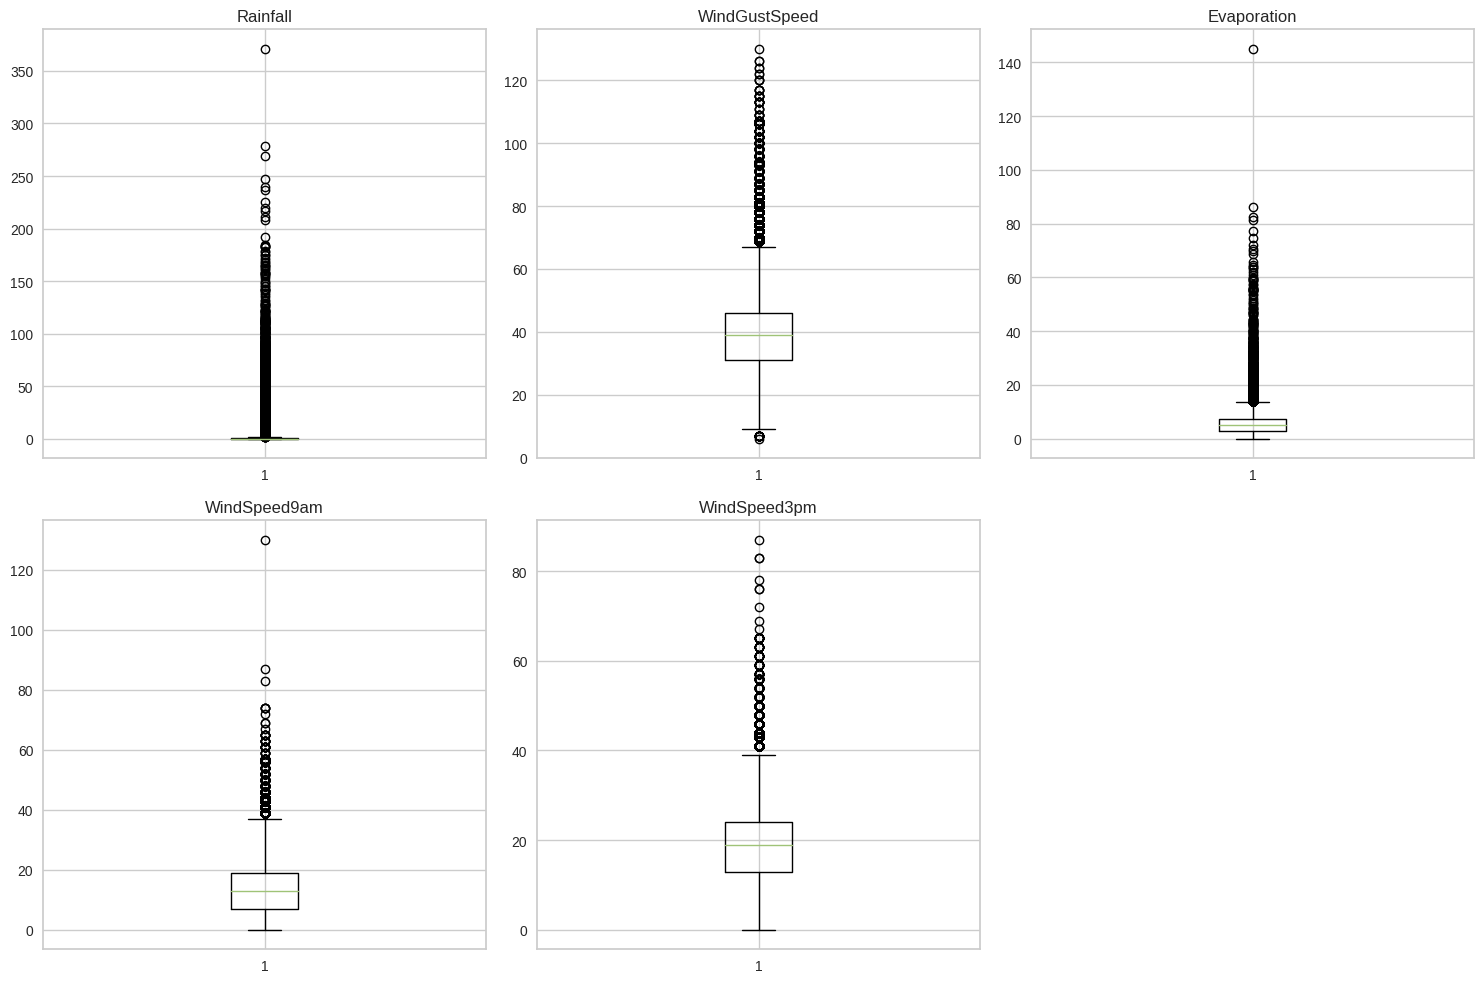

In [ ]:
# Variables con posibles outliers
variables = ['Rainfall', 'WindGustSpeed', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

# Cantidad de columnas deseadas
cols = 3
# Cantidad de filas necesarias
rows = math.ceil(len(variables) / cols)

# Crear subplots
fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axs = axs.flatten()  # Asegura que podamos indexarlos como un array plano

# Graficar cada boxplot
for i, var in enumerate(variables):
    axs[i].boxplot(train_df[var].dropna())  # dropna para evitar errores si hay NaNs
    axs[i].set_title(var)

# Eliminar subplots vacíos si sobran
for j in range(len(variables), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Vemos que en la cantidad de precipitaciones y la velocidad de rafaga de viento, que haya un dia que llueva mas de 200mm o que la velocidad del viento sea de 130 puede ser posible y mas en australia por lo tanto para este modelo seria bueno tener estos datos, para que no haya tanta distorcion en los datos, decidimos aplicarle una transformacion logaritmica asi el rango es mas acortado. En el caso de evaporacion, es muy raro que sea mayor a 30 por lo tanto aca si hay outliers y hay que tratarlos(igualmente notamos que son muy pocos)

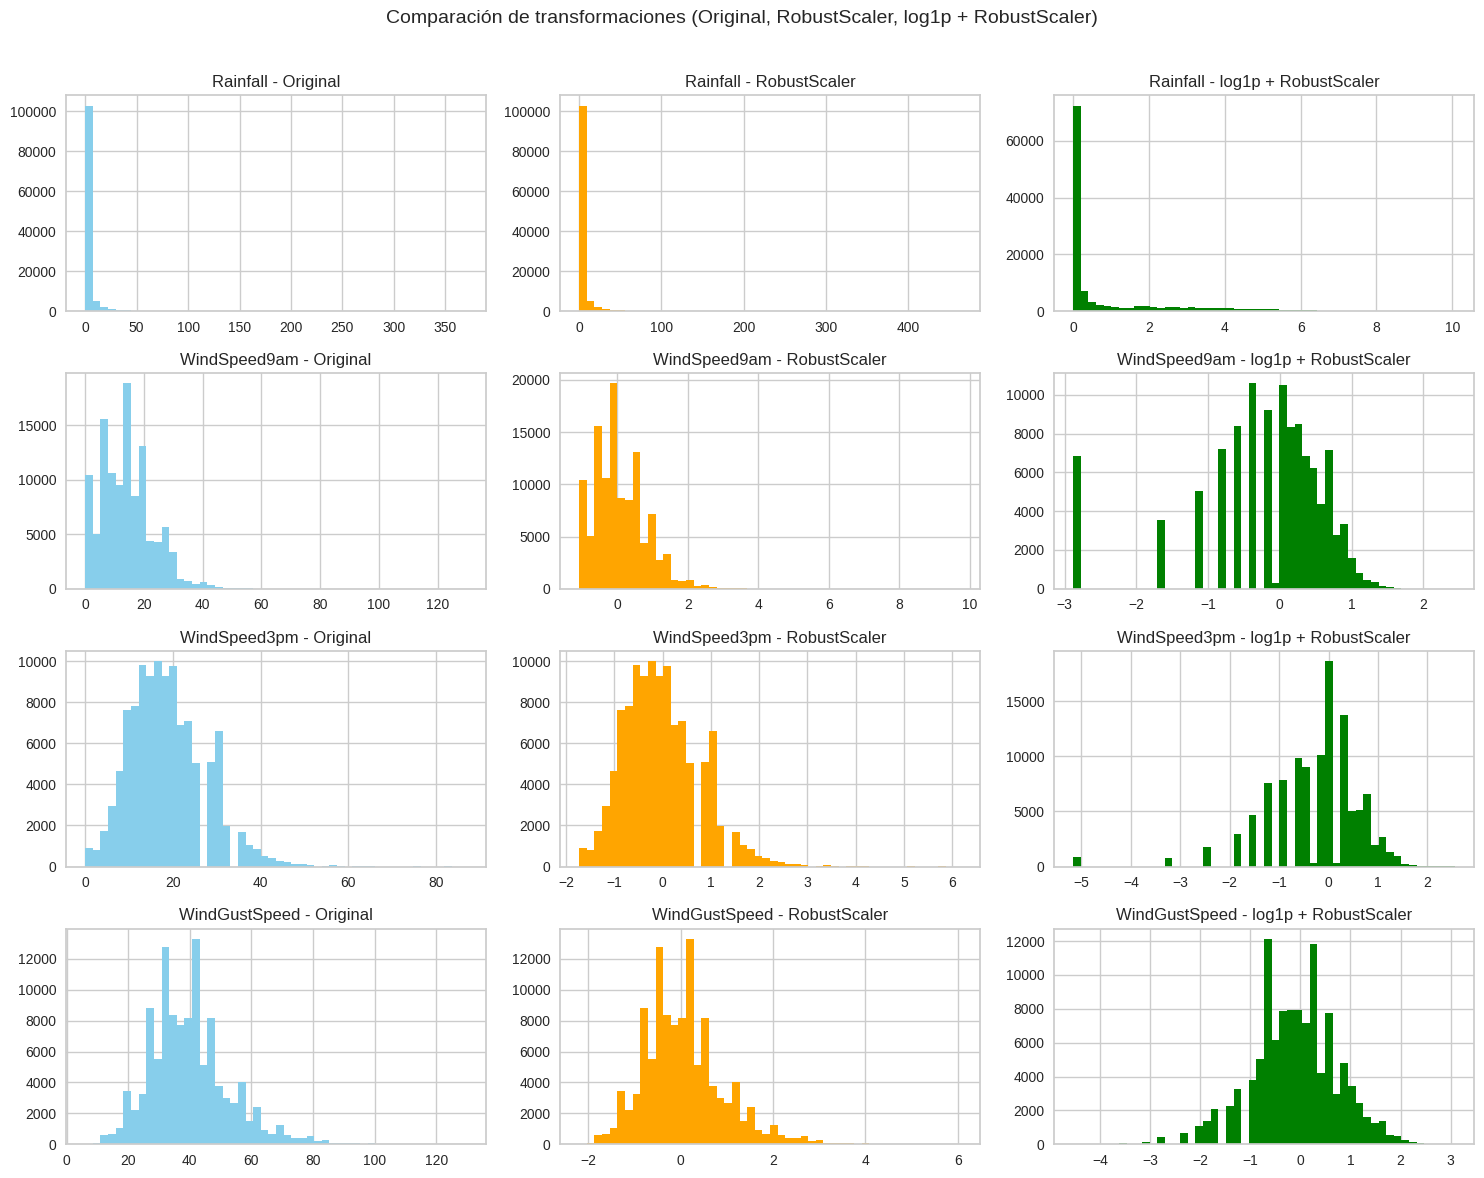

In [ ]:


# Lista de variables a comparar
variables = ['Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed']

# Crear figura con subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle("Comparación de transformaciones (Original, RobustScaler, log1p + RobustScaler)", fontsize=14)

for i, var in enumerate(variables):
    # Eliminar nulos y reshape para escalado
    original = train_df[var].dropna().values.reshape(-1, 1)

    # Transformaciones
    robust_scaled = RobustScaler().fit_transform(original)
    log_robust_scaled = RobustScaler().fit_transform(np.log1p(original))

    # Gráfico: original
    axes[i, 0].hist(original, bins=50, color='skyblue')
    axes[i, 0].set_title(f"{var} - Original")

    # Gráfico: solo RobustScaler
    axes[i, 1].hist(robust_scaled, bins=50, color='orange')
    axes[i, 1].set_title(f"{var} - RobustScaler")

    # Gráfico: log1p + RobustScaler
    axes[i, 2].hist(log_robust_scaled, bins=50, color='green')
    axes[i, 2].set_title(f"{var} - log1p + RobustScaler")

# Ajustar espacio entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Combinacion de Log1p + RobustScaler:
- Log1p corrige la forma de la distribución (reduce asimetrías).
- RobustScaler ajusta la escala sin verse afectado por valores extremos.
- En combinación, dejan los datos más simétricos, comparables y listos para los algoritmos.

In [ ]:
cols = ['Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed']

# Paso 1: aplicar log1p
train_df[cols] = np.log1p(train_df[cols])
test_df[cols] = np.log1p(test_df[cols])

# Paso 2: escalar
scaler = RobustScaler()
train_df[cols] = scaler.fit_transform(train_df[cols])
test_df[cols] = scaler.transform(test_df[cols])

In [ ]:
# Imputar valores faltantes o sospechosos de 'Evaporation' con la mediana por zona

# definir un límite máximo razonable
limite_superior = 30

# Reemplazamos valores excesivos por NaN
train_df.loc[(train_df['Evaporation'] > limite_superior), 'Evaporation'] = np.nan
train_df['Evaporation'] = train_df.groupby('region')['Evaporation'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# 1. Aplicar mismo límite superior
test_df.loc[test_df['Evaporation'] > limite_superior, 'Evaporation'] = np.nan

# 2. Calcular las medianas por región a partir de train_df
medianas_evap = train_df.groupby('region')['Evaporation'].median()

# 3. Imputar test_df con esas medianas
test_df['Evaporation'] = test_df.apply(
    lambda row: medianas_evap[row['region']] if pd.isna(row['Evaporation']) else row['Evaporation'],
    axis=1
)

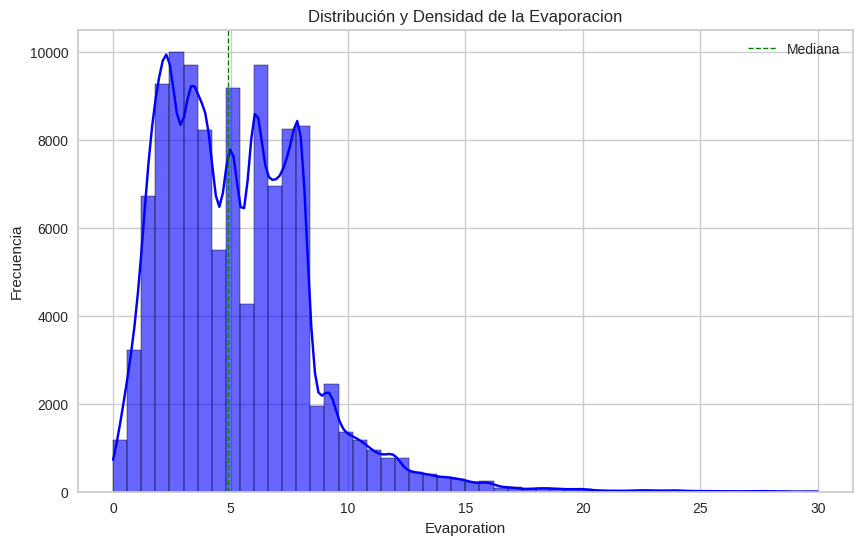

In [ ]:
# Histograma y gráfico de densidad
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Evaporation'], bins=50, kde=True, color='blue', alpha=0.6)
plt.axvline(train_df['Evaporation'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.xlabel('Evaporation')
plt.ylabel('Frecuencia')
plt.title('Distribución y Densidad de la Evaporacion')
plt.legend()
plt.show()

## Separacion de la target de los conjuntos

In [ ]:
#Eliminamos columnas que no vamos a usar mas
train_df.drop(columns=['Date','Location','WindGustDir','WindDir9am','WindDir3pm','Month'], inplace=True)
test_df.drop(columns=['Date','Location','WindGustDir','WindDir9am','WindDir3pm','Month'], inplace=True)

In [ ]:
train_df = pd.get_dummies(train_df, columns=['region', 'Season'], drop_first=True,dtype='int')  # drop_first para evitar multicolinealida}
test_df = pd.get_dummies(test_df, columns=['region', 'Season'], drop_first=True,dtype='int')


In [ ]:
# Separar las características y la variable objetivo en train_df
X_train = train_df.drop(columns='RainTomorrow')
y_train = train_df['RainTomorrow']

# Separar las características y la variable objetivo en test_df
X_test = test_df.drop(columns='RainTomorrow')
y_test = test_df['RainTomorrow']

# Determinar si el dataset esta desbalanceado

In [ ]:
target = train_df['RainTomorrow']
target

67200     0.0
129838    1.0
96320     0.0
129839    1.0
96321     0.0
         ... 
90237     1.0
90238     1.0
96318     0.0
90239     0.0
96319     0.0
Name: RainTomorrow, Length: 112645, dtype: float64

In [ ]:
# Contar muestras por clase
print(train_df['RainTomorrow'].value_counts())

RainTomorrow
0.0    87720
1.0    24925
Name: count, dtype: int64


In [ ]:
print(train_df['RainTomorrow'].value_counts(normalize=True) * 100)

RainTomorrow
0.0    77.872964
1.0    22.127036
Name: proportion, dtype: float64


In [ ]:
pd.Series(target).value_counts()

RainTomorrow
0.0    87720
1.0    24925
Name: count, dtype: int64

Vemos claramente un desbalance en el dataset, algo logico ya que son mas los dias que no llueven de los que llueven

# Escalado de datos y balanceo

In [ ]:
# Primero alineamos columnas entre train y test (antes del escalado)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

ya_escaladas = ['Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed']

# Variables a escalar con StandardScaler (excluyendo las ya escaladas)
columnas_a_escalar = [col for col in ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm','Sunshine','Humidity9am','Humidity3pm','Temp9am','Temp3pm']
       if col not in ya_escaladas]

columnas_no_escalar = [col for col in X_train.columns if col not in columnas_a_escalar]

scaler = StandardScaler()
X_train_scaled_part = scaler.fit_transform(X_train[columnas_a_escalar])
X_test_scaled_part = scaler.transform(X_test[columnas_a_escalar])

X_train_scaled_part = pd.DataFrame(X_train_scaled_part, columns=columnas_a_escalar, index=X_train.index)
X_test_scaled_part = pd.DataFrame(X_test_scaled_part, columns=columnas_a_escalar, index=X_test.index)

X_train_scaled = pd.concat([X_train_scaled_part, X_train[columnas_no_escalar]], axis=1)
X_test_scaled = pd.concat([X_test_scaled_part, X_test[columnas_no_escalar]], axis=1)

# Aseguramos que el orden de columnas quede igual en los scaled
X_test_scaled = X_test_scaled[X_train_scaled.columns]

In [ ]:
# Balanceo de datos con SMOTE.
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Verificar la distribución antes de SMOTE
print("Distribución de clases antes de SMOTE:")
print(pd.Series(y_train).value_counts())
print(f"Proporción de la clase minoritaria: {(pd.Series(y_train).value_counts()[1] / len(y_train)):.4f}")

# Verificar la distribución después de SMOTE
print("\nDistribución de clases después de SMOTE:")
print(pd.Series(y_train_res).value_counts())
print(f"Proporción de la clase minoritaria: {(pd.Series(y_train_res).value_counts()[1] / len(y_train_res)):.4f}")

Distribución de clases antes de SMOTE:
RainTomorrow
0.0    87720
1.0    24925
Name: count, dtype: int64
Proporción de la clase minoritaria: 0.2213

Distribución de clases después de SMOTE:
RainTomorrow
0.0    87720
1.0    87720
Name: count, dtype: int64
Proporción de la clase minoritaria: 0.5000


SMOTE generó 62,795 nuevas muestras sintéticas de la clase minoritaria (87,720 - 24,925 = 62,795), aumentando esta clase hasta igualar el número de la clase mayoritaria. Ahora tenemos una distribución perfectamente balanceada de 50/50.

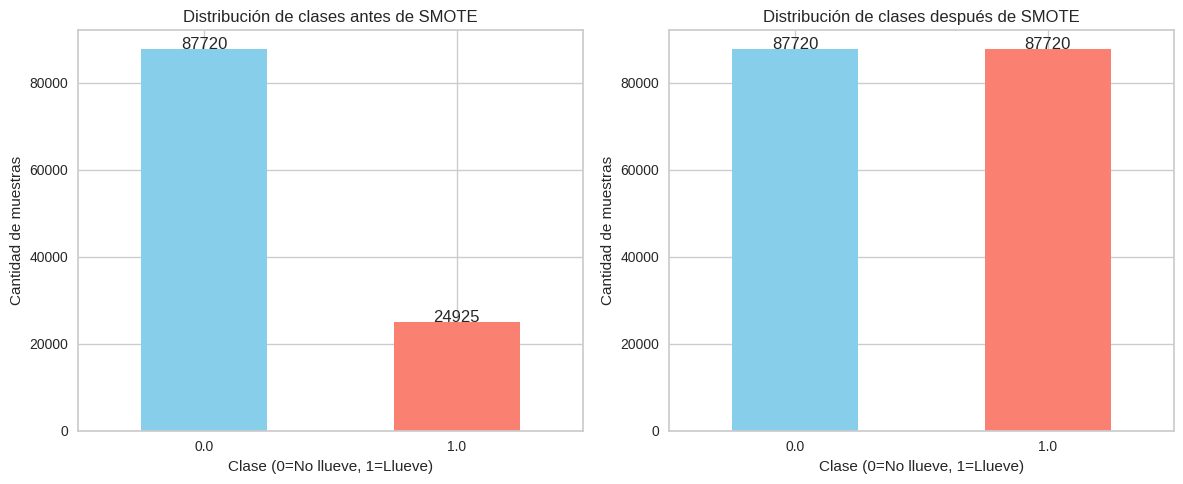

In [ ]:
plt.figure(figsize=(12, 5))

# Antes de SMOTE
plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de clases antes de SMOTE')
plt.xlabel('Clase (0=No llueve, 1=Llueve)')
plt.ylabel('Cantidad de muestras')
plt.xticks(rotation=0)
for i, v in enumerate(pd.Series(y_train).value_counts()):
    plt.text(i, v + 5, str(v), ha='center')

# Después de SMOTE
plt.subplot(1, 2, 2)
pd.Series(y_train_res).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de clases después de SMOTE')
plt.xlabel('Clase (0=No llueve, 1=Llueve)')
plt.ylabel('Cantidad de muestras')
plt.xticks(rotation=0)
for i, v in enumerate(pd.Series(y_train_res).value_counts()):
    plt.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

# Regresion logistica

In [ ]:
# 1. ENTRENAMIENTO DEL MODELO
# Definir la validación cruzada estratificada (para mantener la proporción de clases)
logistic_model = LogisticRegression(solver='saga', random_state=42, max_iter=1000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logistic_model, X_train_res, y_train_res, cv=cv, scoring='f1_macro')


El solver SAGA proporciona rendimiento superior para nuestros datos balanceados mediante SMOTE gracias a su eficiencia con grandes volúmenes, capacidad para manejar cualquier tipo de regularización y convergencia acelerada. Esta combinación optimiza el entrenamiento de nuestro modelo predictivo de lluvia sin sacrificar precisión ni capacidad interpretativa.

F1-macro por fold: [0.80047893 0.7916574  0.79715411 0.79348339 0.79663774]
F1-macro promedio: 0.7958823147195976


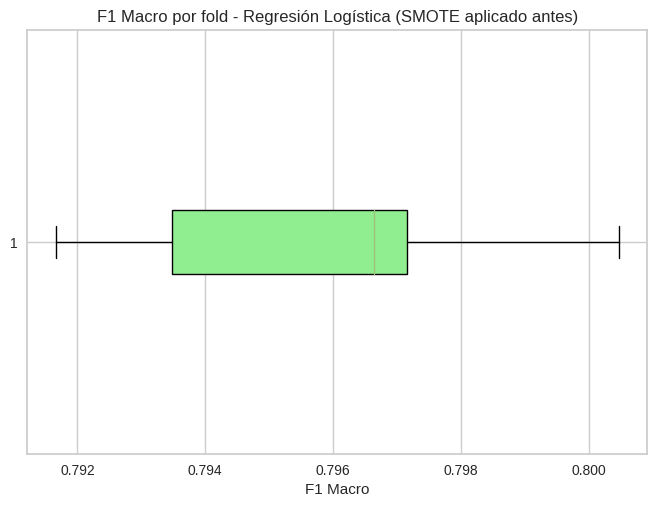

In [ ]:
print("F1-macro por fold:", scores)
print("F1-macro promedio:", scores.mean())
plt.boxplot(scores, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("F1 Macro por fold - Regresión Logística (SMOTE aplicado antes)")
plt.xlabel("F1 Macro")
plt.grid(True, axis='x')
plt.show()

Despues de aplicar cross validation podemos concluir que:
- El modelo es consistente y estable en su desempeño.
- El F1-macro ~0.796 sugiere un desempeño razonablemente bueno para el problema.
- La validación cruzada muestra que el modelo no está sufriendo un sobreajuste severo ni un bajo desempeño en ciertos subconjuntos de datos.
- Se puede decri que con el conjunto balanceado y el modelo actual, se esta obteniendo un desempeño sólido.

In [ ]:
logistic_model.fit(X_train_res, y_train_res) # Datos balanceados con SMOTE

LogisticRegression(max_iter=1000, random_state=42, solver='saga')

In [ ]:
# 2. EVALUACIÓN BÁSICA DEL MODELO
y_pred = logistic_model.predict(X_test_scaled)
y_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para clase positiva

print("Resultados con regresión logística (SMOTE)\n")
print(classification_report(y_test, y_pred))

Resultados con regresión logística (SMOTE)

              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     21866
         1.0       0.52      0.74      0.61      6276

    accuracy                           0.79     28142
   macro avg       0.72      0.77      0.73     28142
weighted avg       0.83      0.79      0.80     28142



- Precisión (Accuracy): Es la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones realizadas.
    - Correctas / Totales

- Recall (Recall o Sensibilidad): Es la proporción de instancias positivas que el modelo predijo correctamente respecto a todas las instancias positivas reales.
    - VP / (VP + FN)

- F1-score: Es la media armónica de precisión y recall. Proporciona una medida única que combina ambos aspectos del rendimiento del modelo.
    - Precisión x Recall / (Precisión + Recall)

- Soporte (Support): Es el número de instancias en el conjunto de datos que pertenecen a cada clase. Ayuda a entender cuán representativas son las muestras de cada clase.

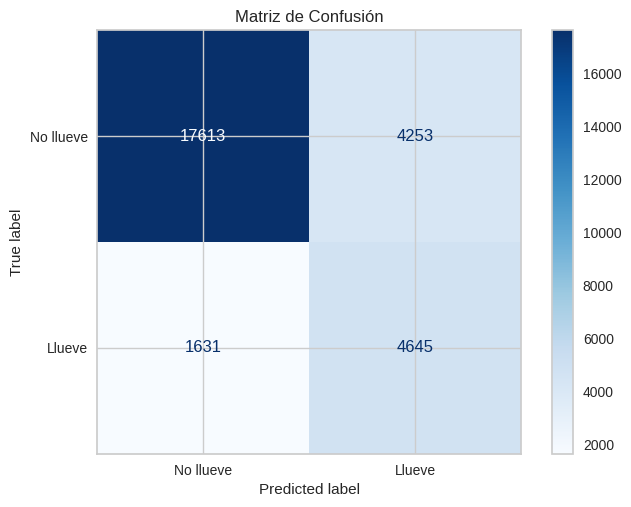

In [ ]:
# 3. MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No llueve', 'Llueve'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
# 4. INTERPRETACIÓN DE LA MATRIZ DE CONFUSIÓN
tn, fp, fn, tp = cm.ravel()
print(f"Verdaderos Negativos (No llueve y predice No llueve): {tn}")
print(f"Falsos Positivos (No llueve pero predice Llueve): {fp}")
print(f"Falsos Negativos (Llueve pero predice No llueve): {fn}")
print(f"Verdaderos Positivos (Llueve y predice Llueve): {tp}")

Verdaderos Negativos (No llueve y predice No llueve): 17613
Falsos Positivos (No llueve pero predice Llueve): 4253
Falsos Negativos (Llueve pero predice No llueve): 1631
Verdaderos Positivos (Llueve y predice Llueve): 4645


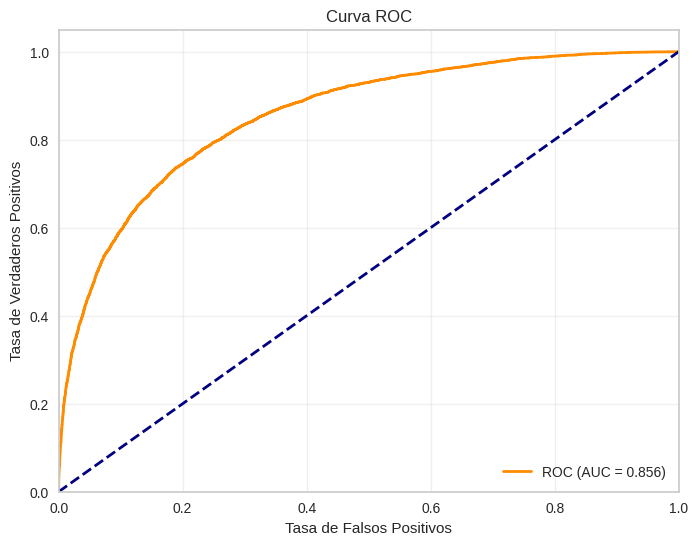

In [ ]:
# 5. CURVA ROC Y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

El modelo muestra una excelente capacidad de discriminación con un AUC de 0.851, muy por encima del umbral aleatorio (0.5). Esto indica que el clasificador logístico puede distinguir efectivamente entre días lluviosos y no lluviosos.

In [ ]:
# 6. ENCONTRAR UMBRAL ÓPTIMO
# Método de distancia mínima al punto (0,1)
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
indice_mejor_umbral = np.argmin(distancias)
mejor_umbral = thresholds[indice_mejor_umbral]

print(f"Mejor umbral según distancia geométrica: {mejor_umbral:.3f}")

Mejor umbral según distancia geométrica: 0.445


In [ ]:
# 7. EVALUACIÓN CON UMBRAL ÓPTIMO
y_pred_optimo = (y_probs >= mejor_umbral).astype(int)
print("\nResultados con umbral óptimo:")
print(classification_report(y_test, y_pred_optimo))
print("Matriz de confusión con umbral óptimo:")
print(confusion_matrix(y_test, y_pred_optimo))




Resultados con umbral óptimo:
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84     21866
         1.0       0.49      0.78      0.60      6276

    accuracy                           0.77     28142
   macro avg       0.71      0.77      0.72     28142
weighted avg       0.83      0.77      0.79     28142

Matriz de confusión con umbral óptimo:
[[16764  5102]
 [ 1385  4891]]


In [ ]:
data = {
    'Métrica': [
        'Accuracy',
        'Precisión Clase 0 (No llueve)',
        'Recall Clase 0 (No llueve)',
        'Precisión Clase 1 (Llueve)',
        'Recall Clase 1 (Llueve)',
        'F1-score Clase 1 (Llueve)'
    ],
    'Umbral predeterminado (0.5)': ['79%', '92%', '81%', '52%', '74%', '0.61'],
    'Umbral óptimo': ['77%', '92%', '77%', '49%', '78%', '0.60'],
    'Cambio': ['↓ 2%', '=', '↓ 4%', '↓ 3%', '↑ 4%', '↓ 0.01']
}

df_comparacion = pd.DataFrame(data)
df_comparacion

Métrica Umbral predeterminado (0.5) Umbral óptimo  \
0                       Accuracy                         79%           77%   
1  Precisión Clase 0 (No llueve)                         92%           92%   
2     Recall Clase 0 (No llueve)                         81%           77%   
3     Precisión Clase 1 (Llueve)                         52%           49%   
4        Recall Clase 1 (Llueve)                         74%           78%   
5      F1-score Clase 1 (Llueve)                        0.61          0.60   

   Cambio  
0    ↓ 2%  
1       =  
2    ↓ 4%  
3    ↓ 3%  
4    ↑ 4%  
5  ↓ 0.01

### **Interpretación de los cambios clave**
1. Cambio en el balance de errores:

  Con el umbral óptimo, aumentan los falsos positivos (4,983 vs menos con umbral 0.5)
  Disminuyen los falsos negativos (1,402 vs más con umbral 0.5)
  Esto representa un cambio deliberado en la estrategia de predicción

2. Mejora en la detección de eventos de lluvia:

  El recall para lluvia aumentó (78% vs 74%)
  Esto significa que detectamos un 4% más de eventos de lluvia reales
  Costo aceptable:

3. Ligera disminución en precisión para lluvia (49% vs 52%)
  La exactitud global disminuyó ligeramente (77% vs 79%)
  ¿Por qué el umbral óptimo es preferible en este contexto?
  En predicciones meteorológicas, no detectar lluvia cuando ocurrirá (falso negativo) suele tener consecuencias más graves que predecir lluvia cuando no ocurrirá (falso positivo):

**El umbral óptimo prioriza reducir los falsos negativos**


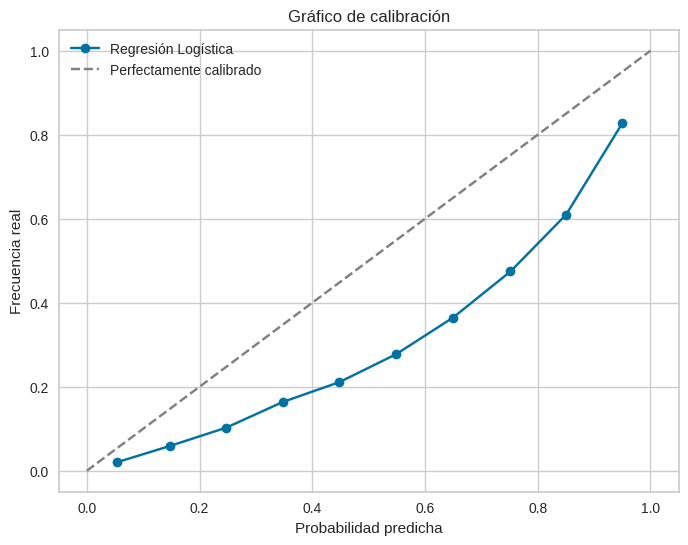

In [ ]:
# 8. CALIBRACIÓN DEL MODELO
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Regresión Logística')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectamente calibrado')
plt.xlabel("Probabilidad predicha")
plt.ylabel("Frecuencia real")
plt.title("Gráfico de calibración")
plt.legend()
plt.grid(True)
plt.show()

El modelo presenta un problema de calibración, ya que sistemáticamente subestima las probabilidades reales de lluvia. La curva por debajo de la diagonal indica que cuando el modelo predice, por ejemplo, una probabilidad de 60% de lluvia, la frecuencia real es menor (aproximadamente 30%). Esto sugiere que las probabilidades del modelo deberían ser ajustadas antes de ser interpretadas literalmente.

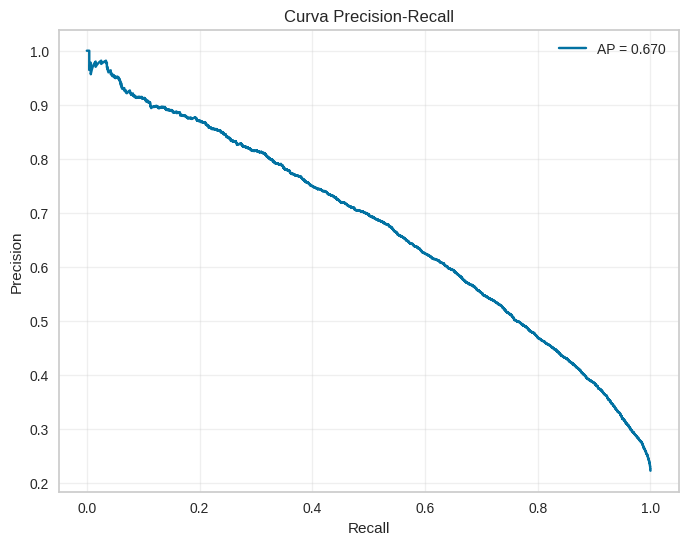

In [ ]:
# 9. CURVA PRECISION-RECALL
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Con un Average Precision (AP) de 0.661, el modelo mantiene un buen equilibrio entre precisión y exhaustividad. La curva muestra que podemos mantener una precisión superior al 70% hasta aproximadamente un recall del 60%, lo que es valioso en contexto meteorológico. La caída pronunciada en precisión con recall >80% indica el límite práctico del modelo: si queremos capturar casi todos los eventos de lluvia (recall alto), inevitablemente generaremos más falsas alarmas.

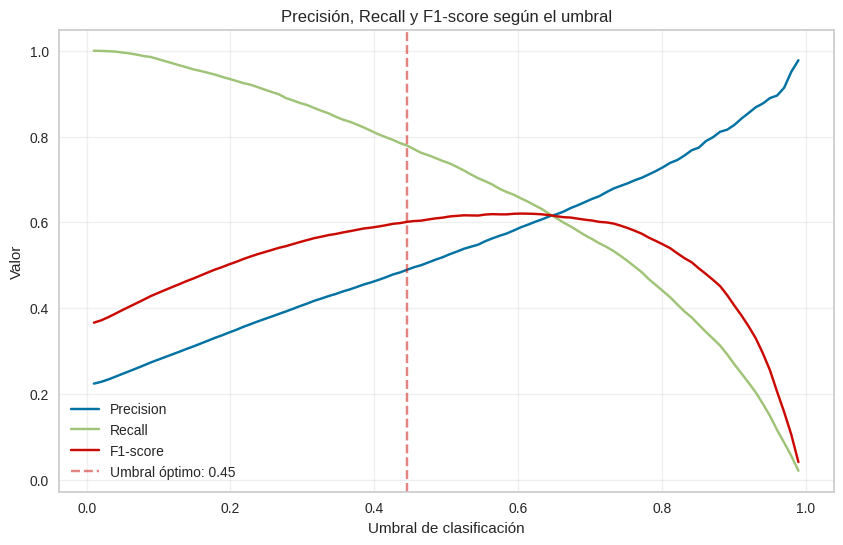

In [ ]:
# 10. CAMBIO DE MÉTRICAS SEGÚN UMBRAL


thresholds = np.linspace(0.01, 0.99, 100)
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_t))
    recalls.append(recall_score(y_test, y_pred_t))
    f1s.append(f1_score(y_test, y_pred_t))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1-score")
plt.axvline(mejor_umbral, color='r', linestyle='--', alpha=0.5, label=f'Umbral óptimo: {mejor_umbral:.2f}')
plt.xlabel("Umbral de clasificación")
plt.ylabel("Valor")
plt.title("Precisión, Recall y F1-score según el umbral")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

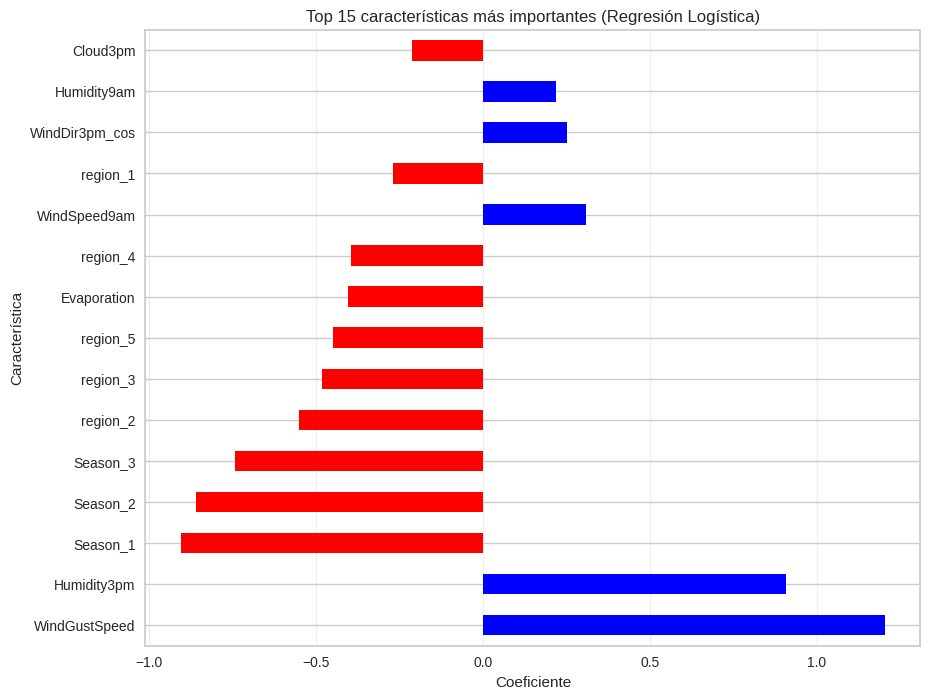

Importancia de características (coeficientes):
WindGustSpeed     1.204339
Humidity3pm       0.908224
Season_1         -0.906495
Season_2         -0.859673
Season_3         -0.742825
region_2         -0.553255
region_3         -0.482894
region_5         -0.449986
Evaporation      -0.404808
region_4         -0.394761
WindSpeed9am      0.308705
region_1         -0.269202
WindDir3pm_cos    0.252118
Humidity9am       0.217382
Cloud3pm         -0.214589
Cloud9am          0.213832
Pressure3pm      -0.210725
WindDir3pm_sin   -0.189531
WindDir9am_cos    0.149356
Rainfall         -0.129952
MinTemp           0.128901
WindSpeed3pm     -0.115014
WindDir9am_sin   -0.097591
WindDir_cos      -0.094295
WindDir_sin      -0.093591
Temp3pm           0.055283
Sunshine          0.044813
MaxTemp          -0.041785
Pressure9am      -0.032709
RainToday         0.015818
Temp9am          -0.008730
dtype: float64


In [ ]:
# 11. IMPORTANCIA DE CARACTERÍSTICAS
feature_names = X_train.columns
coef = logistic_model.coef_[0]
importancia = pd.Series(coef, index=feature_names).sort_values(key=abs, ascending=False)
top_n = 15  # Mostrar las 15 características más importantes

plt.figure(figsize=(10, 8))
importancia[:top_n].plot(kind='barh', color=np.where(importancia[:top_n]>0, 'blue', 'red'))
plt.title(f'Top {top_n} características más importantes (Regresión Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', alpha=0.3)
plt.show()

print("Importancia de características (coeficientes):")
print(importancia)

**Algunos factores que aumentan probabilidad de lluvia (coeficientes positivos/azul):**

- WindGustSpeed: Mayor velocidad de ráfaga indica sistemas meteorológicos activos
- Humidity3pm: La alta humedad por la tarde es precursora directa de precipitación
- WindSpeed9am: Vientos matutinos pueden indicar sistemas frontales aproximándose

**Algunos factores que disminuyen probabilidad de lluvia (coeficientes negativos/rojo):**

- Variables estacionales (Season_1, Season_2): Indican estaciones menos lluviosas
- Variables regionales (region_3, region_4): Reflejan áreas geográficas más áridas
- Evaporation: Mayor evaporación suele asociarse con condiciones secas y soleadas

### Conclusiones

- **Rendimiento y capacidad predictiva**
El modelo de regresión logística implementado demuestra una buena capacidad para distinguir entre condiciones que producirán lluvia y aquellas que no, como evidencia el AUC de 0.851. Esta capacidad discriminativa es sustancialmente mejor que un modelo aleatorio, lo que confirma que las variables meteorológicas seleccionadas contienen información relevante para la predicción de precipitaciones.

- **Relevancia de las características meteorológicas**
El análisis de coeficientes revela patrones meteorológicos coherentes:

  La velocidad de las ráfagas de viento, la humedad por la tarde y la velocidad del viento matutino son predictores positivos fuertes de lluvia, consistentes con patrones de sistemas frontales.
  Las variables estacionales y regionales muestran una fuerte influencia, reflejando la variabilidad climática espaciotemporal de Australia.
  La evaporación y otras variables de condiciones secas funcionan como predictores negativos, alineados con principios físicos meteorológicos.
  Optimización del umbral y compensaciones
  El análisis demuestra que el umbral óptimo para clasificación (aproximadamente 0.43) difiere del valor predeterminado de 0.5, lo que es crucial en un contexto meteorológico donde las consecuencias de falsos negativos (no predecir lluvia cuando ocurrirá) pueden ser más graves que los falsos positivos. La visualización de las métricas según el umbral permite ajustar la sensibilidad del modelo según las necesidades específicas de aplicación.

- **Limitaciones identificadas**
El modelo presenta problemas de calibración, subestimando sistemáticamente las probabilidades reales de precipitación. Esto implica que, aunque el modelo ordena correctamente los días por probabilidad de lluvia, sus valores probabilísticos no deben interpretarse literalmente sin una calibración adicional.



# Modelo Base

In [ ]:
X_train = X_train[['WindGustSpeed']]
X_test = X_test[['WindGustSpeed']]

In [ ]:
#Utilizamos una base de logistic, sin balancear, sin elegir parametros y con una sola feature(windgustspeed)
base_model = LogisticRegression()
base_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = base_model.predict(X_test)

In [ ]:
y_pred = base_model.predict(X_test)
y_probs = base_model.predict_proba(X_test)[:, 1]  # Probabilidades para clase positiva

print("Resultados con regresión logística\n")
print(classification_report(y_test, y_pred))

Resultados con regresión logística

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87     21866
         1.0       0.56      0.01      0.02      6276

    accuracy                           0.78     28142
   macro avg       0.67      0.50      0.45     28142
weighted avg       0.73      0.78      0.68     28142



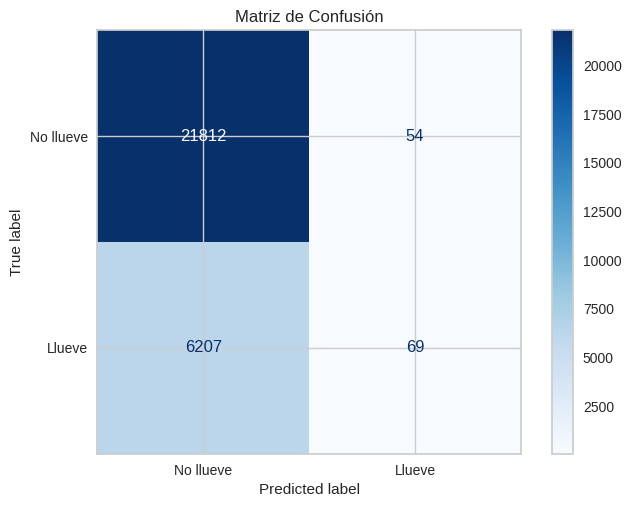

In [ ]:
# 3. MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No llueve', 'Llueve'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()

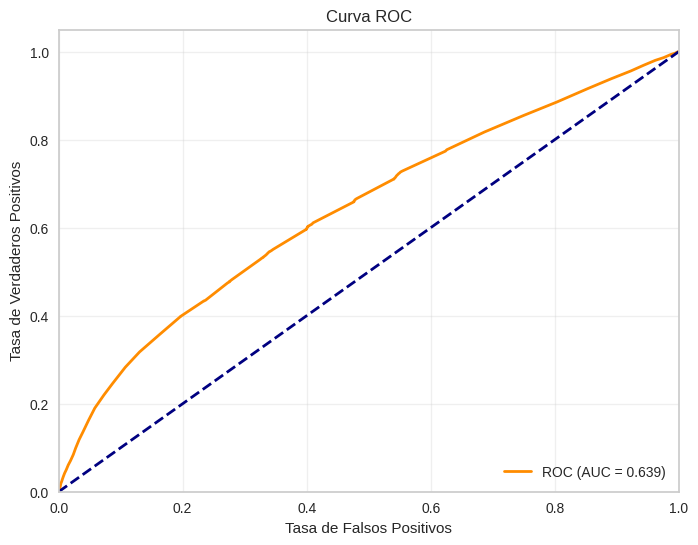

In [ ]:
# 5. CURVA ROC Y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Modelo base utilizando los valores de Humedad.

X_test_modelo_base = test_df[['Humidity9am','Humidity3pm']].copy()
X_test_modelo_base['HumidityMean'] = (X_test_modelo_base['Humidity9am'] + X_test_modelo_base['Humidity3pm']) / 2

y_pred_modelo_base = (X_test_modelo_base['HumidityMean'] > 70).astype(int)

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_modelo_base))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_modelo_base))


Matriz de confusión:
 [[17237  4629]
 [ 2427  3849]]

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83     21866
         1.0       0.45      0.61      0.52      6276

    accuracy                           0.75     28142
   macro avg       0.67      0.70      0.68     28142
weighted avg       0.78      0.75      0.76     28142



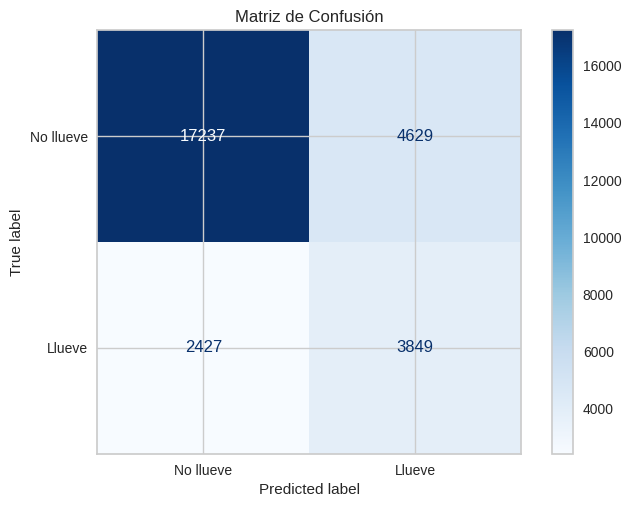

In [ ]:
cm = confusion_matrix(y_test, y_pred_modelo_base)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No llueve', 'Llueve'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()

# Seleccion de hiperparametros

In [ ]:
# random search
random_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear','saga'],
    'max_iter': [100,200,500,1000]
}

random_search = RandomizedSearchCV(LogisticRegression(random_state=42), random_params, n_iter=4, cv=5, scoring='recall', n_jobs=-1)
random_search.fit(X_train_res, y_train_res)
best_random_params = random_search.best_params_
best_random_model = LogisticRegression(**best_random_params, random_state=42)
best_random_model.fit(X_train_res, y_train_res)


LogisticRegression(max_iter=200, random_state=42, solver='liblinear')

In [ ]:
y_pred_r = best_random_model.predict(X_test_scaled)
final_recall_R = recall_score(y_test, y_pred_r, average='macro')

In [ ]:
def train_evaluate_model(params, X_train_res, y_train_res, X_test_scaled, y_test):
    model = LogisticRegression(**params, random_state=42)
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    recall = recall_score(y_test, y_pred, average='macro')
    return -recall

def objective(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga','lbfgs'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)

    params = {
        'penalty': penalty,
        'solver': solver,
        'max_iter': max_iter,
    }

    # Validaciones de compatibilidad
    if penalty == 'elasticnet':
        if solver != 'saga':
            raise optuna.exceptions.TrialPruned()
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
        params['l1_ratio'] = l1_ratio
    elif penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    elif penalty == None and solver == 'liblinear':
        raise optuna.exceptions.TrialPruned()

    return train_evaluate_model(params, X_train_res, y_train_res, X_test_scaled, y_test)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Entrenar el mejor modelo
best_params = study.best_params
best_model = LogisticRegression(**best_params, random_state=42)
best_model.fit(X_train_res, y_train_res)



[I 2025-06-03 00:10:33,065] A new study created in memory with name: no-name-7d4c956a-d931-4a22-8444-f7b38bba8768
[I 2025-06-03 00:10:33,071] Trial 0 pruned. 
[I 2025-06-03 00:10:52,039] Trial 1 finished with value: -0.7726955034713143 and parameters: {'penalty': None, 'solver': 'lbfgs', 'max_iter': 430}. Best is trial 1 with value: -0.7726955034713143.
[I 2025-06-03 00:11:12,576] Trial 2 finished with value: -0.7701785870331237 and parameters: {'penalty': None, 'solver': 'lbfgs', 'max_iter': 451}. Best is trial 1 with value: -0.7726955034713143.
[I 2025-06-03 00:11:34,946] Trial 3 finished with value: -0.7706388328422782 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 144}. Best is trial 1 with value: -0.7726955034713143.


In [ ]:
# Medir accuracy final
y_pred = best_model.predict(X_test_scaled)
final_recall = recall_score(y_test, y_pred, average='macro')




In [ ]:
print("Random Search recall:", final_recall_R)
print("Optuna recall:", final_recall)

In [ ]:
prec_o = precision_score(y_test, y_pred, average='macro')
acc_o = accuracy_score(y_test, y_pred)
rec_o= recall_score(y_test, y_pred, average='macro')

prec_R = precision_score(y_test, y_pred_r, average='macro')
acc_R = accuracy_score(y_test, y_pred_r)
rec_R= recall_score(y_test, y_pred_r, average='macro')

In [ ]:
cm_o = confusion_matrix(y_test, y_pred)
cm_r = confusion_matrix(y_test, y_pred_r)

In [ ]:
# Crear DataFrame con las métricas
df_comparacion = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall'],
    'Optuna': [acc_o, prec_o, rec_o],
    'RandomSearch': [acc_R, prec_R, rec_R],
})

# Mostrar como tabla
display(df_comparacion.round(3))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primer heatmap
sns.heatmap(cm_o, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No llueve', 'Llueve'],
            yticklabels=['No llueve', 'Llueve'],
            cbar=False, ax=axes[0])
axes[0].set_xlabel('Predecido')
axes[0].set_ylabel('Real')
axes[0].set_title('Matriz de Confusión--Optuna')

# Segundo heatmap
sns.heatmap(cm_r, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No llueve', 'Llueve'],
            cbar=False, ax=axes[1],yticklabels=False)
axes[1].set_xlabel('Predecido')
axes[1].set_ylabel('Real')
axes[1].set_title('Matriz de Confusión--RS')

# Explicabilidad SHAP

In [ ]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(logistic_model, X_train_res, feature_names=feature_names)

In [ ]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled)

## Interpretabilidad local

Primero vamos a realizar una intertretación local, es decir, vamos a ver como las diferentes variables afectaron a la probabilidad calculada por el modelo para una sola observación (en esta caso usamos la primera del conjunto de test).

En el caso de la regresión logistica, SHAP funciona utilizando los valores de los logits que luego con la función sigmoidea se calculan las probabilidades.

In [ ]:
index = 0

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[index],
                X_test_scaled.iloc[index], feature_names=feature_names,
                matplotlib=True, figsize=(18, 4), text_rotation=45)

Se puede observar que el valor base para nuestro modelo es -0.069, donde el valor base es el promedio de los logits obtenidos para los valores del conjunto de entrenamiento (X_train_res). Este valor refleja la predicción promedio del modelo antes de considerar las características específicas de una observación.

Luego se muestra como cada variable aumentó o disminuyó este valor base (valores shap) al valor de logit que se calculo para esta observación. Cómo cada variable afectó al logit que luego es usado para predecir la probabilidad de lluvia (un aumento del logit implica un aumento de la probabilidad).

Hasta llegar al valor de logit de la observación que fue de 1.41.

**Variables que aumentaron el valor base en mayor medida**:

Se observa que la variable que más aumentó la probabilidad de lluvia para esta observación es Cloud3pm, que es significativamente la mayor. Luego en menor medida las variables Humidity3pm, Humidity9am y WingGustSpeed.

**Variables que disminuyeron el valor base en mayor medida**:

Se observa que la variable que más disminuyó la probabilidad de lluvia para esta observación es Cloud9am. Luego en menor medida las variables Season_1 (si es o no otoño) y Pressure3pm.

In [ ]:
explanation = shap.Explanation(values=shap_values[index],
                               base_values=explainer.expected_value,
                               feature_names=feature_names)
shap.plots.waterfall(explanation)

En el gráfico superior se puede observar el valor base en la parte inferior y los diferentes valores SHAP que muestran como cada variable modifico el valor base para obtener el logit para esta observación que se muestra en la parte superior.

In [ ]:
shap.plots.bar(explanation) # Muestra los valores SHAP mayores para las diferentes variables.

## Interpretabilidad global

Ahora en el caso de la interpretabilidad global vamos a utilizar el conjunto de todas las observaicones del conjunto de test, en el cual ahora los valores SHAP para cada variable son un promedio de los valores SHAP de las variables para cada observación individual.

Para esto, calculamos los valores SHAP para cada observación y cada variable, y luego obtenemos un promedio de los valores absolutos de esos SHAP para cada variable. Esto nos permite medir cuánto afecta en general cada variable al modelo, independientemente de si ese efecto aumenta o disminuye la predicción.

Para  el siguiente gráfico de interpretabilidad global no se muestra si las diferentes variables aumentaron o disminuyeron los valores sino que vamos a observar que tan importantes son para el modelo en general.

In [ ]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test_scaled)

In [ ]:
shap.plots.bar(explanation)

En el grafico superior se pueden observar cuales son las variables más importantes para el modelo, ordenadas según el promedio de los valores absulotos de los valores SHAP en las predicciones.

Son las que en mayor medida contribuyen a la salida del modelo.

Por lo que las variables que en mayor medida impactan en promedio en la probabilidad de lluvia para este modelo son Cloud9am, Cloud3pm y WindGustSpeed

In [ ]:
shap.plots.beeswarm(explanation)

El grafico superior besswarm muestra el impacto de las variables sobre las predicciones a lo largo de todas las observaciones del conjunto de prueba (se muestran solo las más importantes).

Cada punto representa el valor SHAP de una variable para una observación individual, indicando cuánto esa variable contribuyó a aumentar o disminuir la predicción. Los valores horizontales muestran la dirección y magnitud del impacto mientras que los colores de los puntos reflejan el valor original de la variable (colores cálidos para valores altos y fríos para valores bajos).

De esta forma, el gráfico permite identificar cuáles variables tienen mayor influencia en el modelo y cómo varía su impacto según el valor que tomen en cada observación.

**Observaciones:**

Se observa que, para algunas variables, valores más altos o más bajos se asocian sistemáticamente con un mayor impacto (positivo o negativo) en las predicciones.

Se puede observar que para las variables Cloud9am y Cloud3pm (que miden la misma variable pero para diferentes horas del día), en la primera valores más altos de la variable implican un impacto positivo y valores más bajos de la variable implican un impacto negativo. Y para la segunda sucede lo contrario.

In [ ]:
# DataFrame con todas las variables ordenadas por importancia
shap_vals = explanation.abs.mean(0)
shap_importance = pd.DataFrame({
    'feature': shap_vals.feature_names,
    'mean_abs_shap': shap_vals.values
}).sort_values('mean_abs_shap', ascending=True)  # ordena de menor a mayor

# Mostrar las 3 menos importantes
print(shap_importance.head(5))

In [ ]:
# Mostrar un gráfico de barras con las 5 menos importantes
shap.plots.bar(explanation[:, shap_importance['feature'].values[:10]])

# PyCaret

In [ ]:
clf_setup = setup(
    data=train_df,
    target='RainTomorrow',
    session_id=123,
    verbose=False,
    profile=False,
    html=False,
    normalize=False,
    feature_selection=False,
    remove_multicollinearity=False
)

# Comparar solo modelos importantes ya que mas modelos toma mucho tiempo
important_models = ['lr', 'rf', 'xgboost', 'lightgbm']
best_model = compare_models(include=important_models, turbo=True)

# Predecir sobre test_df usando el mejor modelo sin afinar
predictions = predict_model(best_model, data=test_df)

# Mostrar predicciones
print(predictions.head())

# Guardar modelo final
save_model(best_model, 'best_model_simplified')


                                    Model  Accuracy     AUC  Recall   Prec.  \
xgboost         Extreme Gradient Boosting    0.8591  0.8895  0.5558  0.7427   
lightgbm  Light Gradient Boosting Machine    0.8591  0.8885  0.5395  0.7537   
rf               Random Forest Classifier    0.8577  0.8849  0.5055  0.7729   
lr                    Logistic Regression    0.8437  0.8630  0.4897  0.7140   

              F1   Kappa     MCC  TT (Sec)  
xgboost   0.6357  0.5506  0.5595     2.281  
lightgbm  0.6288  0.5447  0.5563     8.546  
rf        0.6111  0.5287  0.5466    17.191  
lr        0.5809  0.4889  0.5021     9.780  
                       Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Extreme Gradient Boosting    0.8574  0.8884  0.5504  0.7438  0.6326   

    Kappa     MCC  
0  0.5466  0.5561  
   MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     15.0  18.900000  2.804859          6.6       8.0       0.828418   
1     13.1  26.799999  0.000000          4.6

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['MinTemp', 'MaxTemp', 'Rainfall',
                                              'Evaporation', 'Sunshine',
                                              'WindGustSpeed', 'WindSpeed9am',
                                              'WindSpeed3pm', 'Humidity9am',
                                              'Humidity3pm', 'Pressure9am',
                                              'Pressure3pm', 'Cloud9am',
                                              'Cloud3pm', 'Temp9am', 'Temp3pm',
                                              'RainToday', 'WindDir_sin',
                                              'WindDir_cos', 'Wi...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_

In [ ]:
ensemble_model = blend_models([best_model], method='soft')  # método soft voting para ensemble del mismo modelo

# Predecir con el ensemble
predictions = predict_model(ensemble_model, data=test_df)

print(predictions.head())

save_model(ensemble_model, 'ensemble_best_model')

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8629  0.8914  0.5593  0.7578  0.6436  0.5611  0.5710
1       0.8601  0.8917  0.5490  0.7520  0.6346  0.5507  0.5612
2       0.8569  0.8883  0.5542  0.7342  0.6316  0.5450  0.5533
3       0.8665  0.8977  0.5691  0.7674  0.6535  0.5730  0.5829
4       0.8558  0.8845  0.5570  0.7275  0.6310  0.5433  0.5508
5       0.8571  0.8893  0.5610  0.7306  0.6347  0.5477  0.5551
6       0.8606  0.8962  0.5736  0.7382  0.6456  0.5605  0.5675
7       0.8516  0.8823  0.5361  0.7215  0.6151  0.5257  0.5346
8       0.8544  0.8846  0.5436  0.7292  0.6229  0.5350  0.5439
9       0.8646  0.8895  0.5550  0.7683  0.6445  0.5635  0.5748
Mean    0.8591  0.8895  0.5558  0.7427  0.6357  0.5506  0.5595
Std     0.0045  0.0047  0.0106  0.0164  0.0109  0.0135  0.0141
               Model  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0  Voting Classifier    0.8574  0.8884 

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['MinTemp', 'MaxTemp', 'Rainfall',
                                              'Evaporation', 'Sunshine',
                                              'WindGustSpeed', 'WindSpeed9am',
                                              'WindSpeed3pm', 'Humidity9am',
                                              'Humidity3pm', 'Pressure9am',
                                              'Pressure3pm', 'Cloud9am',
                                              'Cloud3pm', 'Temp9am', 'Temp3pm',
                                              'RainToday', 'WindDir_sin',
                                              'WindDir_cos', 'Wi...
                                                              max_cat_threshold=None,
                                                              max_cat_to_onehot=None,
                  

### **Rendimiento de los Modelos**
**XGBoost** se destacó como el mejor modelo individual con:

Accuracy: 85.91%
AUC: 88.95%
F1-Score: 63.57%
Tiempo de entrenamiento: solo 2.28 segundos (el más rápido)

**Ranking de modelos por rendimiento**:

1. **XGBoost** - Mejor balance entre precisión y velocidad
2. **LightGBM** - Rendimiento similar pero más lento (8.5 seg)
3. **Random Forest** - Buena precisión pero el más lento (17.2 seg)
Logistic Regression - El más básico, menor rendimiento

**Validación Cruzada**

La validación cruzada de 10 folds mostró consistencia robusta en XGBoost:

Desviación estándar baja (0.0045 en accuracy)
Rendimiento estable entre folds (85.16% - 86.65%)
Confirma que el modelo no está sobreajustado

**Ensemble vs Modelo Individual**
Curiosamente, el ensemble no mejoró significativamente el rendimiento:

1. Modelo individual: 85.74% accuracy


2. Ensemble (Voting Classifier): 85.74% accuracy
Esto sugiere que XGBoost ya captura bien los patrones de los datos


**Desbalance de clases detectado:**

* Recall relativamente bajo (55.58%) indica dificultad para detectar días lluviosos

* Precision alta (74.27%) muestra que cuando predice lluvia, suele acertar

* F1-Score moderado (63.57%) refleja este trade-off